# Endangered Birds and Fish Lab Notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.optimize import curve_fit
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
sns.set()
%matplotlib inline

# Choosing and finding the datasets:


Our project started by a dataset research. At the beginning of this research our question was just about endangered species in general. But as it was difficult to find good datasets in such a broad sense, we decided to be more precise with our question and to concentrate on endangered birds and fish. For this specific topic we found a dataset which included the historical development of endangered birds and fish. Additionally we found a dataset for the current numbers divided by different countries. Furthermore we found datasets with different regional, geographical, natural and environmental characteristics. With this datasets we will be able to have a look at how geographical, natural and environmental characteristics incluence a higher percentage of endangered birds and fish. Furthermore we found datasets for specific countries which also includes historical data. We will use this one to try to predict the numbers of endangered birds and fish there. At the end we will see if all the resulsts are consistent with each other.

Despite the fact that we have changed our question to make it more concrete, answearing these questions will give an overview in general and a deeper insight in the population of birds and fish. It will be interesting to see how the numbers are effected by geographical, natural and environmental characteristics as well as how the numbers have changed in total over the last years.

# Questions which we want to answer:
##### - How has the population of endangered birds and fish has evolved over time and what are the current numbers in different regions?
##### - Which geographical, natural and environmental characteristics predict a higher percentage of endangered birds and fish in a country?
##### - How unlikely will it be to encounter threatened fish species in the future?

Let's start with the first Question.

# Question 1: How has the population of endangered birds and fish has evolved over time and what are the current numbers in different regions?

Main contributor: Martina Aschauer

#### How will we obtain the answears to this question?
We will answer this question by dividing it in two parts. The first part is about the overall historical development of endangered birds and fish. Therefore we will use a dataset with the historical total numbers of birds and fish worldwide and we will visualise these numbers. With this first part we will gain an overall insight on the developments in this areas and we will also get a reason for why this topic is important. In the second part of this question we will use another dataset, which includes the current numbers of different regions. With this dataset we will try to visualise the difference of the percentage of endangered birds and fish in different regions. The hope with this task is to see in which areas are more endangered birds and fish.

We will divide this questions in two parts. The first part is tackling the question about the changes over time and the second part about the current numbers. Therefore we will use three datasets.

##### Dataset IUCN_table_2.csv
https://www.iucnredlist.org/resources/summary-statistics
The dataset is from the IUCN Red list of threatened species website. IUCN stands for International Union of Conservation. Here the number of species listed in each Red List Category is changing every time, the Red List is updated. These numbers are changing over time because:
- species are constantly being assessed and added to the IUCN Red List for the first time
- other species are being reassessed resulting in some moving into different Red List Categories
- taxonomic revisions result in the total number of recognised species within a group changing
Additionally to species changing their status, the IUCN Red List grows larger with each update as newly described species and species from the less well-known groups are assessed for the first time. IUCN and it's partners are working to expand the number of taxonomic groups that have full and complete Red List assessments in order to improve our knowledge of the status of the world's biodiversity. Therefore one has to be careful when looking at the numbers of species in each Red List Category. it gives a quite good snapshot of the current status of species, but it should not be interpreted as a full and complete assessment of the world's biodiversity.

The summary table we used is based on absolute numbers of how many species are Critically Endangered (CR), Endangered (EN) or Vulnerable (VU). It is also divided into Categories like Birds, Fish, etc. This dataset here includes the changes in numbers of species in the threatened categories (CR, EN, VU) from 1996 to 2021. Some years like 2005 are missing in this dataset, but the reason for that is not mentioned on the website. Maybe it was due to an missing update because of any reason.


##### Dataset WILD_LIFE.csv
https://stats.oecd.org/Index.aspx?DataSetCode=WILD_LIFE
This dataset is from the OECD Website. OECD stands for Organisation for economic co-operation and development and it consists of 38 member states at the moment. Not every member state has been one of its initial member states, some countries joined later like Poland in 1996. As we are just looking at the current numbers of 2021 and not at an historical development with this dataset, we don't have to think about which country joined the OECD in which year. 

The data is built on country replies to the Annual Quality Assurance of OECD environmental reference series. These data are harmonised, updated and revised from the OECD. Some countries report data according to their national classification, others report their national red list data and others IUCN Red List data. When interpreting these data, it should be borne in mind that the number of species known does not always accurately reflect the number of species in extistence and that varying definitions can limit comparability accross countries.

This dataset includes different species, their total numbers (divided in Categories like Critically Endangered (CR), Endangered (EN) or Vulnerable (VU)) and their relative numbers by country. Reporting the proportion of threatened species on The IUCN Red List is complicated by the fact that not all species groups have been fully evaluated, and also by the fact that some species have so little information available that they can only be assessed as Data Deficient (DD). 

But to be able to compare the data by country and region we used relative numbers which told us for example what the percentage of threatened birds in one country is. This is a more reliable way of comparing the numbers of different countries.



##### Dataset countryContinent.csv
https://www.kaggle.com/statchaitya/country-to-continent
This Dataset is just kind of a mapping table from the country names or country codes to the right continent or sub region of a continent. It includes every country (and it's continent) which is in the WILD_LIFE.csv dataset. Therefore we were able to use it to get different insights on how the current numbers of threatened birds and fish are in different continents, sub regions and countries.



## Historical Development

As our question is about birds and fish, we start by looking at how the numbers of vulnerable, endangered and critically endangered birds and fish developed over time. In this dataset there are no missing values. You can just see that some years like 2005 are missing. The reason for the missing years is unknown, but maybe it was due to an missing update of the datasets. But as the missing years are just at the beginning of this time series, we will get a good overview anyway.

In [2]:
df_history = pd.read_csv("data/IUCN_table_2.csv", sep=';')
df_history.set_index('Year')

,Birds_CR,Fishes_CR,Birds_ER,Fishes_ER,Birds_VU,Fishes_VU
Year,,,,,,
1998,168,157,235,134,704,443
2000,182,156,321,144,680,452
2002,182,157,326,143,684,442
2003,182,162,331,144,681,444
2004,179,171,345,160,688,470
2006,181,253,351,237,674,681
2007,189,254,356,254,672,693
2008,190,289,361,269,671,717
2009,192,306,362,298,669,810


In [3]:
df_history_birds = df_history[["Year", "Birds_CR", "Birds_ER", "Birds_VU"]].set_index('Year')
df_history_fish = df_history[["Year", "Fishes_CR", "Fishes_ER", "Fishes_VU"]].set_index('Year')

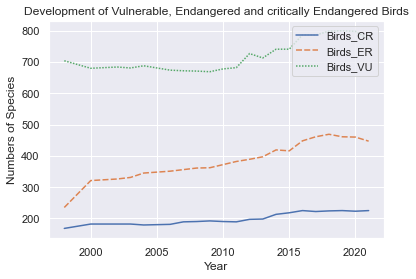

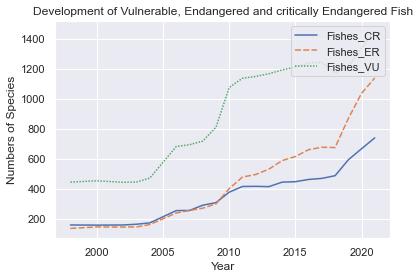

In [4]:
sns.lineplot(data=df_history_birds).set(title="Development of Vulnerable, Endangered and critically Endangered Birds")
plt.xlabel("Year")
plt.ylabel("Numbers of Species")
plt.legend(loc="upper right")
plt.savefig('history_birds.png')
plt.show()


sns.lineplot(data=df_history_fish).set(title="Development of Vulnerable, Endangered and critically Endangered Fish")
plt.xlabel("Year")
plt.ylabel("Numbers of Species")
plt.legend(loc="upper right")
plt.savefig('history_fish.png')
plt.show()

##### Interpretation of the Results:

These graphs illustrate how threatened birds and fish has evolved over time. Especially when looking at the fish data we can see, that the number of threatened fish has increased a lot over the last years. In Contrast to that, birds did not change so dramatically over time. But as mentioned in the description of the dataset, a higher number of threatened species could also be a result of assessing more species. Therefore we can't trust the numbers fully. But it is good to get a feeling of how the numbers are changing.

## Current numbers

Now let's take a closer look at the current numbers of endangered birds and fish. We have already seen how the numbers have evolved over time, regarding worldwide numbers. In this step we want to have a look at the relative numbers from the OECD and what the percentages of all birds an fish are endangered. We decided to compare the relative numbers per country/region/continent as total numbers would not be consistent for this comparison. Some countries have more different kinds of birds of fish than others, so they would probably have a higher total number of endangered birds and fish too. Although the percentage of endangerd birds to the total number would be smaller than in an other country. Therefore we choose the relative numbers to be able to make a good comparison.

In [5]:
df = pd.read_csv("data/WILD_LIFE.csv")

In [6]:
df.head()

,IUCN,IUCN Category,SPEC,Species,COU,Country,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,TOT_KNOWN,Total number of known species,MAMMAL,Mammals,AUS,Australia,NBR,Number,0,Units,NaN,NaN,380.0,NaN,NaN
1,TOT_KNOWN_IND,Total number of indigenous known species,MAMMAL,Mammals,AUS,Australia,NBR,Number,0,Units,NaN,NaN,353.0,NaN,NaN
2,ENDANGERED,Number of endangered species,MAMMAL,Mammals,AUS,Australia,NBR,Number,0,Units,NaN,NaN,38.0,NaN,NaN
3,CRITICAL,Number of critically endangered species,MAMMAL,Mammals,AUS,Australia,NBR,Number,0,Units,NaN,NaN,10.0,NaN,NaN
4,VULNERABLE,Number of vulnerable species,MAMMAL,Mammals,AUS,Australia,NBR,Number,0,Units,NaN,NaN,59.0,NaN,NaN


In this dataset you also see a lot of Nan, but as they are just in columns which we do not need we can just ignore them.

At first we take a look at which species are contained in this dataset and what IUCN Categories are included. Afterwards we can concentrate on Birds and Fish.

In [7]:
df["Species"].unique()

array(['Mammals', 'Birds', 'Reptiles', 'Amphibians', 'Vascular plants',
       'Fish', 'Marine Fish', 'Freshwater Fish', 'Mosses', 'Lichens',
       'Invertebrates'], dtype=object)

In [8]:
df["IUCN"].unique()

array(['TOT_KNOWN', 'TOT_KNOWN_IND', 'ENDANGERED', 'CRITICAL',
       'VULNERABLE', 'THREATENED', 'ENDANGERED_IND', 'CRITICAL_IND',
       'VULNERABLE_IND', 'THREAT_PERCENT', 'THREATENED_IND',
       'IND_PERCENT'], dtype=object)

In [9]:
df["Country"].unique()

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Czech Republic',
       'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
       'Iceland', 'Ireland', 'Italy', 'Japan', 'Korea', 'Mexico',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Slovak Republic', 'Spain', 'Sweden', 'Switzerland', 'Turkey',
       'United Kingdom', 'Chile', 'Estonia', 'Israel', 'Russia',
       'Slovenia', 'Luxembourg', 'Colombia', 'Latvia', 'Brazil',
       'Costa Rica', 'Lithuania'], dtype=object)

To be able to also compare it in a more regional way we want to add which country is on which continent or area of a continent. 

In [10]:
df_continent = pd.read_csv("data/countryContinent.csv",  sep=',', encoding = 'unicode_escape')

In [11]:
df_continent.rename(columns={"code_3": "COU"}, inplace=True)
df_continent.head()

,country,code_2,COU,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,150.0,154.0
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,150.0,39.0
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,2.0,15.0
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,9.0,61.0


In [12]:
df_incl_continent = pd.merge(df, df_continent, on="COU")

In [13]:
df_incl_continent.head()

,IUCN,IUCN Category,SPEC,Species,COU,Country,Unit Code,Unit,PowerCode Code,PowerCode,...,Flag Codes,Flags,country,code_2,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code
0,TOT_KNOWN,Total number of known species,MAMMAL,Mammals,AUS,Australia,NBR,Number,0,Units,...,NaN,NaN,Australia,AU,36,ISO 3166-2:AU,Oceania,Australia and New Zealand,9.0,53.0
1,TOT_KNOWN_IND,Total number of indigenous known species,MAMMAL,Mammals,AUS,Australia,NBR,Number,0,Units,...,NaN,NaN,Australia,AU,36,ISO 3166-2:AU,Oceania,Australia and New Zealand,9.0,53.0
2,ENDANGERED,Number of endangered species,MAMMAL,Mammals,AUS,Australia,NBR,Number,0,Units,...,NaN,NaN,Australia,AU,36,ISO 3166-2:AU,Oceania,Australia and New Zealand,9.0,53.0
3,CRITICAL,Number of critically endangered species,MAMMAL,Mammals,AUS,Australia,NBR,Number,0,Units,...,NaN,NaN,Australia,AU,36,ISO 3166-2:AU,Oceania,Australia and New Zealand,9.0,53.0
4,VULNERABLE,Number of vulnerable species,MAMMAL,Mammals,AUS,Australia,NBR,Number,0,Units,...,NaN,NaN,Australia,AU,36,ISO 3166-2:AU,Oceania,Australia and New Zealand,9.0,53.0


In [14]:
# check if every Country was mapped
print("Count of unique Countries in the original dataset: {}".format(len(df["Country"].unique())))
print("Count of unique Countries in the original dataset: {}".format(len(df_incl_continent["Country"].unique())))

Count of unique Countries in the original dataset: 39
Count of unique Countries in the original dataset: 39


To get a feeling on the total numbers too we just take a look at the different boxplots.

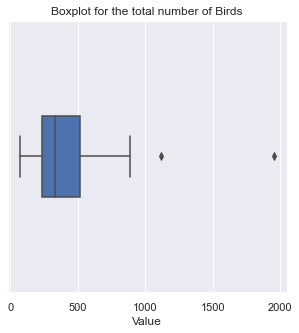

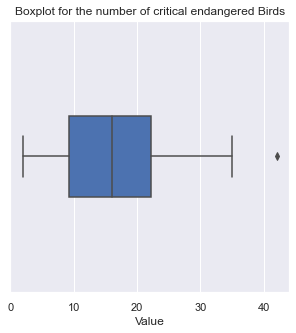

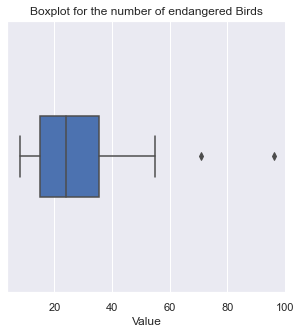

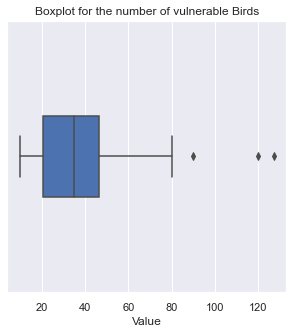

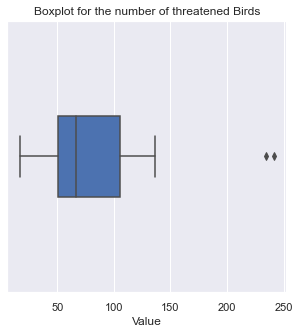

In [15]:
# Boxplots for Birds

plt.rcParams["figure.figsize"] = (5,5)
sns.boxplot(x=df_incl_continent[ (df_incl_continent.Species == 'Birds') & (df_incl_continent.IUCN == 'TOT_KNOWN')]['Value'], width=0.3, saturation=1).set(title="Boxplot for the total number of Birds")
plt.show()

sns.boxplot(x=df_incl_continent[ (df_incl_continent.Species == 'Birds') & (df_incl_continent.IUCN == 'CRITICAL')]['Value'], width=0.3, saturation=1).set(title="Boxplot for the number of critical endangered Birds")
plt.show()

sns.boxplot(x=df_incl_continent[ (df_incl_continent.Species == 'Birds') & (df_incl_continent.IUCN == 'ENDANGERED')]['Value'], width=0.3, saturation=1).set(title="Boxplot for the number of endangered Birds")
plt.show()

sns.boxplot(x=df_incl_continent[ (df_incl_continent.Species == 'Birds') & (df_incl_continent.IUCN == 'VULNERABLE')]['Value'], width=0.3, saturation=1).set(title="Boxplot for the number of vulnerable Birds")
plt.show()

sns.boxplot(x=df_incl_continent[ (df_incl_continent.Species == 'Birds') & (df_incl_continent.IUCN == 'THREATENED')]['Value'], width=0.3, saturation=1).set(title="Boxplot for the number of threatened Birds")
plt.show()


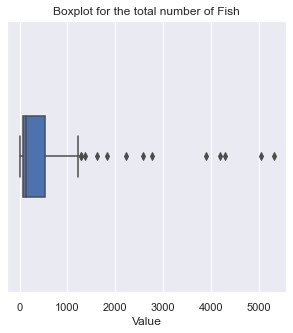

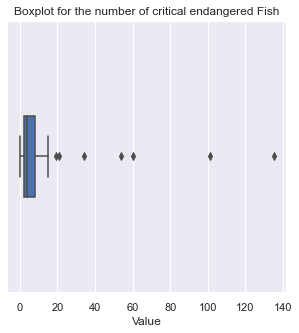

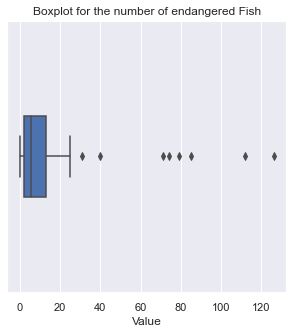

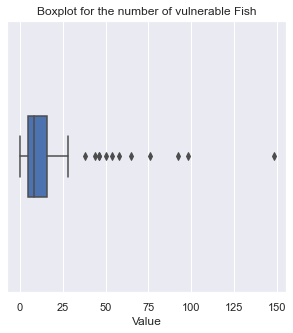

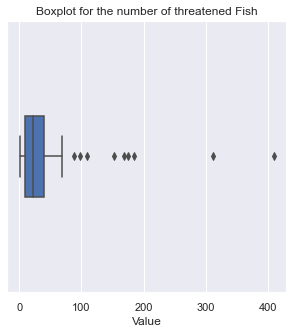

In [16]:
# Boxplots for Fish

plt.rcParams["figure.figsize"] = (5,5)
sns.boxplot(x=df_incl_continent[ ((df_incl_continent.Species == 'Fish') | (df_incl_continent.Species == 'Marine Fish') | (df_incl_continent.Species == 'Freshwater Fish')) & (df_incl_continent.IUCN == 'TOT_KNOWN')]['Value'], width=0.3, saturation=1).set(title="Boxplot for the total number of Fish")
plt.show()

sns.boxplot(x=df_incl_continent[ ((df_incl_continent.Species == 'Fish') | (df_incl_continent.Species == 'Marine Fish') | (df_incl_continent.Species == 'Freshwater Fish')) & (df_incl_continent.IUCN == 'CRITICAL')]['Value'], width=0.3, saturation=1).set(title="Boxplot for the number of critical endangered Fish")
plt.show()

sns.boxplot(x=df_incl_continent[ ((df_incl_continent.Species == 'Fish') | (df_incl_continent.Species == 'Marine Fish') | (df_incl_continent.Species == 'Freshwater Fish')) & (df_incl_continent.IUCN == 'ENDANGERED')]['Value'], width=0.3, saturation=1).set(title="Boxplot for the number of endangered Fish")
plt.show()

sns.boxplot(x=df_incl_continent[ ((df_incl_continent.Species == 'Fish') | (df_incl_continent.Species == 'Marine Fish') | (df_incl_continent.Species == 'Freshwater Fish')) & (df_incl_continent.IUCN == 'VULNERABLE')]['Value'], width=0.3, saturation=1).set(title="Boxplot for the number of vulnerable Fish")
plt.show()

sns.boxplot(x=df_incl_continent[ ((df_incl_continent.Species == 'Fish') | (df_incl_continent.Species == 'Marine Fish') | (df_incl_continent.Species == 'Freshwater Fish')) & (df_incl_continent.IUCN == 'THREATENED')]['Value'], width=0.3, saturation=1).set(title="Boxplot for the number of threatened Fish")
plt.show()

### Birds

As we are looking on relative numbers, we have to calculate them in the beginning. Therefore we need the total numbers of birds and the total numbers of endangered, critically endangered, vulnerable and threatened birds. Therefore we can just look at the parts of the data where there are no missing values, as we can't calculate the relative numbers with missing values. Therefore we are just considering countries without missing data.

#### per Continent

In [17]:
df_birds_continent = df_incl_continent[(df_incl_continent.Species == 'Birds')][['IUCN', 'Species', 'continent', 'Value']]
df_birds_continent = df_birds_continent.pivot_table(values='Value', index='continent', columns='IUCN', aggfunc='sum')
df_birds_continent['REST'] = df_birds_continent['TOT_KNOWN'] - df_birds_continent['CRITICAL'] - df_birds_continent['ENDANGERED']  - df_birds_continent['VULNERABLE'] - df_birds_continent['THREATENED']
df_birds_continent = df_birds_continent[['CRITICAL', 'ENDANGERED', 'VULNERABLE', 'THREATENED', 'REST', 'TOT_KNOWN']].dropna()

df_birds_continent

IUCN,CRITICAL,ENDANGERED,VULNERABLE,THREATENED,REST,TOT_KNOWN
continent,,,,,,
Americas,106.0,254.0,414.0,775.0,3594.0,5143.0
Asia,38.0,42.0,72.0,169.0,1412.0,1733.0
Europe,389.0,604.0,897.0,1954.0,4030.0,7874.0
Oceania,17.0,55.0,63.0,135.0,783.0,1053.0


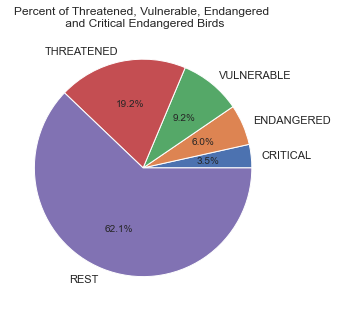

In [18]:
plt.rcParams["figure.figsize"] = (5,5)
df_birds_continent[['CRITICAL', 'ENDANGERED', 'VULNERABLE', 'THREATENED', 'REST']].sum().plot.pie(autopct="%.1f%%", title="Percent of Threatened, Vulnerable, Endangered \n and Critical Endangered Birds")
plt.ylabel(None)
plt.savefig('pie_birds.png')
plt.show()

In [19]:
def df_calculate_percentages(data):
    data_new = data.copy(deep=True)
    data_new['CRITICAL_PCT'] = data_new['CRITICAL']/data_new['TOT_KNOWN']
    data_new['ENDANGERED_PCT'] = data_new['ENDANGERED']/data_new['TOT_KNOWN']
    data_new['VULNERABLE_PCT'] = data_new['VULNERABLE']/data_new['TOT_KNOWN']
    data_new['THREATENED_PCT'] = data_new['THREATENED']/data_new['TOT_KNOWN']
    data_new['REST_PCT'] = data_new['REST']/data_new['TOT_KNOWN']
    data_new = data_new[['CRITICAL_PCT', 'ENDANGERED_PCT', 'VULNERABLE_PCT', 'THREATENED_PCT', 'REST_PCT']]
    return data_new

df_birds_continent_pct = df_calculate_percentages(df_birds_continent)

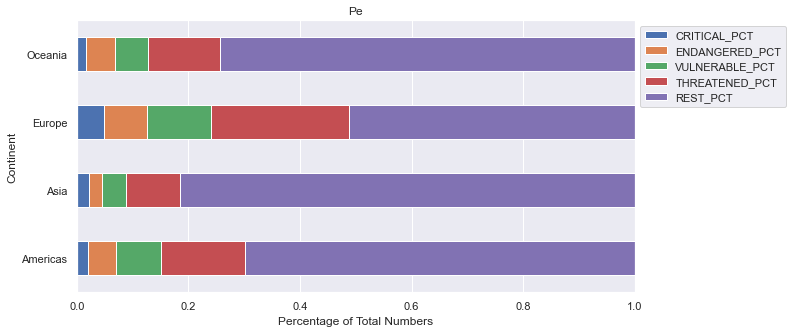

In [20]:
plt.rcParams["figure.figsize"] = (10,5)
df_birds_continent_pct.plot.barh(alpha=1, stacked=True, rot=0)
plt.title("Pe")
plt.ylabel("Continent")
plt.xlabel("Percentage of Total Numbers")
plt.xlim(0,1)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

##### Interpretation:

Here we can see that the proportion of threatened birds is much higher in Europe than for example in Asia. Oceania (Australia) and America are in the mittle with their proportions. 

#### per Sub Region

In [21]:
df_birds_subregion = df_incl_continent[(df_incl_continent.Species == 'Birds')][['IUCN', 'Species', 'sub_region', 'Value']]
df_birds_subregion = df_birds_subregion.pivot_table(values='Value', index='sub_region', columns='IUCN', aggfunc='sum')
df_birds_subregion['REST'] = df_birds_subregion['TOT_KNOWN'] - df_birds_subregion['CRITICAL'] - df_birds_subregion['ENDANGERED']  - df_birds_subregion['VULNERABLE'] - df_birds_subregion['THREATENED']
df_birds_subregion = df_birds_subregion[['CRITICAL', 'ENDANGERED', 'VULNERABLE', 'THREATENED', 'REST', 'TOT_KNOWN']].dropna()

df_birds_subregion

IUCN,CRITICAL,ENDANGERED,VULNERABLE,THREATENED,REST,TOT_KNOWN
sub_region,,,,,,
Australia and New Zealand,17.0,55.0,63.0,135.0,783.0,1053.0
Central America,20.0,104.0,147.0,271.0,1463.0,2005.0
Eastern Asia,38.0,42.0,72.0,152.0,923.0,1227.0
Eastern Europe,84.0,87.0,107.0,335.0,529.0,1142.0
Northern America,26.0,14.0,48.0,88.0,498.0,674.0
Northern Europe,128.0,235.0,378.0,748.0,1520.0,3009.0
South America,60.0,136.0,219.0,416.0,1633.0,2464.0
Southern Europe,71.0,147.0,193.0,411.0,1310.0,2132.0
Western Europe,106.0,135.0,219.0,460.0,671.0,1591.0


In [22]:
df_birds_subregion_pct = df_calculate_percentages(df_birds_subregion)

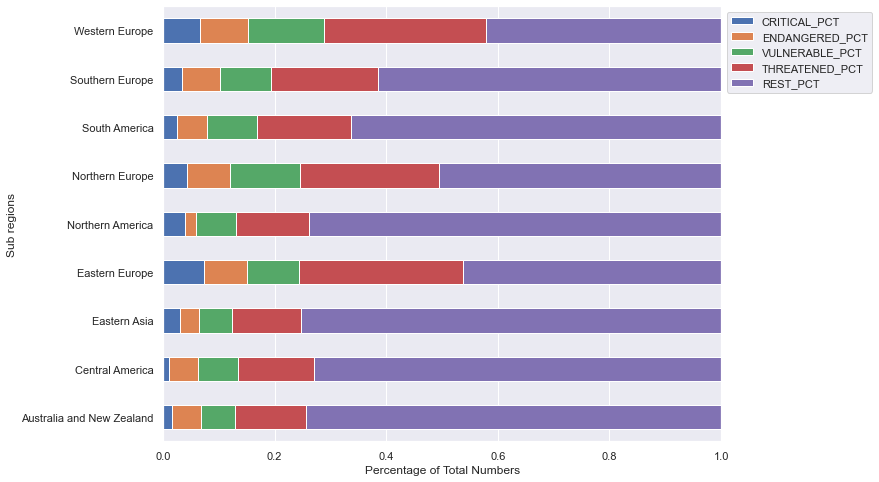

In [23]:
plt.rcParams["figure.figsize"] = (10,8)
df_birds_subregion_pct.plot.barh(alpha=1, stacked=True, rot=0)
plt.ylabel("Sub regions")
plt.xlabel("Percentage of Total Numbers")
plt.xlim(0,1)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

##### Interpretation:

As we have seen before Europe is the continent with the highes proportion of threatened birds. Therefore we are now looking at sub regions. Here we see that Europe is now divided in Wester, Norther, Southern and Eastern Europe. Western, Northern and Eastern Europe are reflecting the Trend we saw above in Europe. In Contrast we see, that Southern Europe has a far lower proportion of endangered birds than the other sub regions in europe.

#### per Country

In [24]:
df_birds_country = df_incl_continent[(df_incl_continent.Species == 'Birds')][['IUCN', 'Species', 'Country', 'Value']]
df_birds_country = df_birds_country.pivot_table(values='Value', index='Country', columns='IUCN', aggfunc='sum')
df_birds_country['REST'] = df_birds_country['TOT_KNOWN'] - df_birds_country['CRITICAL'] - df_birds_country['ENDANGERED']  - df_birds_country['VULNERABLE'] - df_birds_country['THREATENED']
df_birds_country = df_birds_country[['CRITICAL', 'ENDANGERED', 'VULNERABLE', 'THREATENED', 'REST', 'TOT_KNOWN']].dropna()

df_birds_country

IUCN,CRITICAL,ENDANGERED,VULNERABLE,THREATENED,REST,TOT_KNOWN
Country,,,,,,
Australia,17.0,55.0,63.0,135.0,529.0,799.0
Austria,14.0,24.0,28.0,66.0,81.0,213.0
Belgium,20.0,15.0,20.0,55.0,88.0,198.0
Canada,26.0,14.0,48.0,88.0,498.0,674.0
Chile,2.0,25.0,19.0,46.0,418.0,510.0
Colombia,16.0,40.0,80.0,136.0,1682.0,1954.0
Costa Rica,2.0,8.0,20.0,30.0,828.0,888.0
Czech Republic,35.0,35.0,45.0,115.0,7.0,237.0
Denmark,24.0,15.0,45.0,84.0,73.0,241.0


In [25]:
df_birds_country_pct = df_calculate_percentages(df_birds_country)

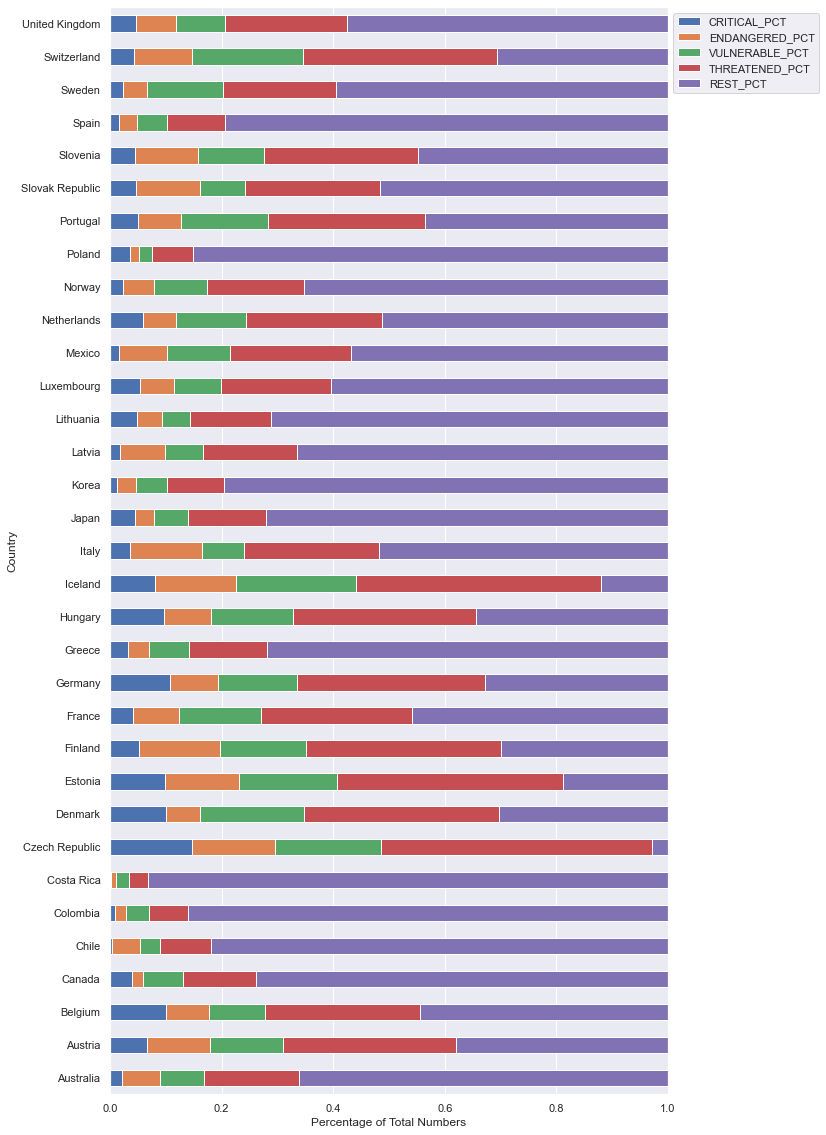

In [26]:
plt.rcParams["figure.figsize"] = (10,20)
df_birds_country_pct.plot.barh(alpha=1, stacked=True, rot=0)
plt.ylabel("Country")
plt.xlabel("Percentage of Total Numbers")
plt.xlim(0,1)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.savefig('bars_birds.png')

##### Interpretation of the Results:

Looking at the results in a more detailed way, based on countries confirms that. The countries with the highes proportions of threatened birds are Czech Republic, Iceland and Estonia. You can also see the trend that the countries with the highest proportions of threatened birds are in Europe.

### Fish

As we are looking on relative numbers, we have to calculate them in the beginning. Therefore we need the total numbers of fish and the total numbers of endangered, critically endangered, vulnerable and threatened birds. Therefore we can just look at the parts of the data where there are no missing values, as we can't calculate the relative numbers with missing values. Therefore we are just considering countries without missing data.

#### per Continent

In [27]:
df_fish_continent = df_incl_continent[(df_incl_continent.Species == 'Fish') | (df_incl_continent.Species == 'Marine Fish') | (df_incl_continent.Species == 'Freshwater Fish')][['IUCN', 'Species', 'continent', 'Value']]
df_fish_continent = df_fish_continent.pivot_table(values='Value', index='continent', columns='IUCN', aggfunc='sum')
df_fish_continent['REST'] = df_fish_continent['TOT_KNOWN'] - df_fish_continent['CRITICAL'] - df_fish_continent['ENDANGERED']  - df_fish_continent['VULNERABLE'] - df_fish_continent['THREATENED']
df_fish_continent = df_fish_continent[['CRITICAL', 'ENDANGERED', 'VULNERABLE', 'THREATENED', 'REST', 'TOT_KNOWN']].dropna()

df_fish_continent

IUCN,CRITICAL,ENDANGERED,VULNERABLE,THREATENED,REST,TOT_KNOWN
continent,,,,,,
Americas,328.0,532.0,780.0,1640.0,17709.0,20989.0
Asia,128.0,184.0,106.0,418.0,11942.0,12778.0
Europe,272.0,337.0,472.0,1191.0,8840.0,11112.0
Oceania,14.0,38.0,48.0,100.0,11109.0,11309.0


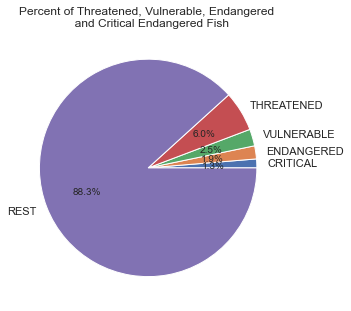

In [28]:
plt.rcParams["figure.figsize"] = (5,5)
df_fish_continent[['CRITICAL', 'ENDANGERED', 'VULNERABLE', 'THREATENED', 'REST']].sum().plot.pie(autopct="%.1f%%", title="Percent of Threatened, Vulnerable, Endangered \n  and Critical Endangered Fish")
plt.ylabel(None)
plt.savefig('pie_fish.png')
plt.show()

In [29]:
df_fish_continent_pct = df_calculate_percentages(df_fish_continent)

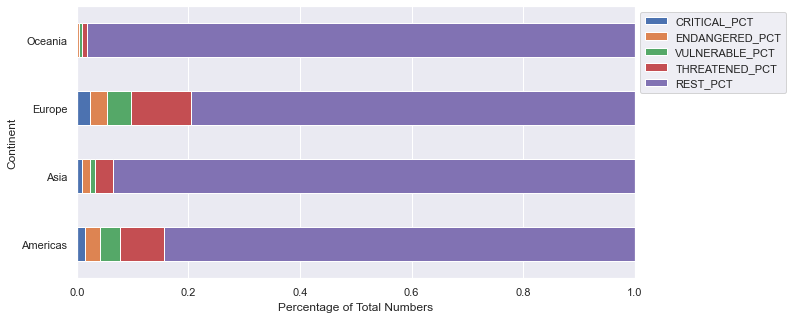

In [30]:
plt.rcParams["figure.figsize"] = (10,5)
df_fish_continent_pct.plot.barh(alpha=1, stacked=True, rot=0)
plt.ylabel("Continent")
plt.xlabel("Percentage of Total Numbers")
plt.xlim(0,1)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

##### Interpretation:

Here we see, that the highest proportion of endangered fish is in Europe, followed by America.

#### per Sub Region

In [31]:
df_fish_rubregion = df_incl_continent[(df_incl_continent.Species == 'Fish') | (df_incl_continent.Species == 'Marine Fish') | (df_incl_continent.Species == 'Freshwater Fish')][['IUCN', 'Species', 'sub_region', 'Value']]
df_fish_rubregion = df_fish_rubregion.pivot_table(values='Value', index='sub_region', columns='IUCN', aggfunc='sum')
df_fish_rubregion['REST'] = df_fish_rubregion['TOT_KNOWN'] - df_fish_rubregion['CRITICAL'] - df_fish_rubregion['ENDANGERED']  - df_fish_rubregion['VULNERABLE'] - df_fish_rubregion['THREATENED']
df_fish_rubregion = df_fish_rubregion[['CRITICAL', 'ENDANGERED', 'VULNERABLE', 'THREATENED', 'REST', 'TOT_KNOWN']].dropna()

df_fish_rubregion

IUCN,CRITICAL,ENDANGERED,VULNERABLE,THREATENED,REST,TOT_KNOWN
sub_region,,,,,,
Australia and New Zealand,14.0,38.0,48.0,100.0,11109.0,11309.0
Central America,28.0,169.0,201.0,398.0,6531.0,7327.0
Eastern Asia,128.0,184.0,106.0,418.0,10344.0,11180.0
Eastern Europe,38.0,19.0,49.0,216.0,356.0,678.0
Northern America,18.0,50.0,108.0,176.0,2400.0,2752.0
Northern Europe,46.0,38.0,61.0,145.0,3037.0,3327.0
South America,282.0,313.0,471.0,1066.0,8778.0,10910.0
Southern Europe,106.0,164.0,156.0,426.0,4663.0,5515.0
Western Europe,82.0,116.0,206.0,404.0,784.0,1592.0


In [32]:
df_fish_subregion_pct = df_calculate_percentages(df_fish_rubregion)

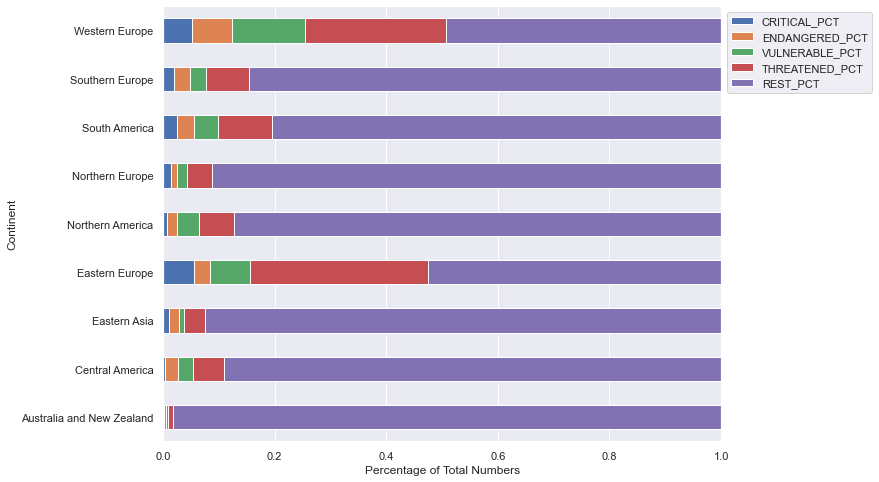

In [33]:
plt.rcParams["figure.figsize"] = (10,8)
df_fish_subregion_pct.plot.barh(alpha=1, stacked=True, rot=0)
plt.ylabel("Continent")
plt.xlabel("Percentage of Total Numbers")
plt.xlim(0,1)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

##### Interpretation:

Regarding the result from above, we see that the proportion of endangered fish in Europe is driven by Western and Eastern Europe.

#### per Country

In [34]:
df_fish_country = df_incl_continent[(df_incl_continent.Species == 'Fish') | (df_incl_continent.Species == 'Marine Fish') | (df_incl_continent.Species == 'Freshwater Fish')][['IUCN', 'Species', 'Country', 'Value']]
df_fish_country = df_fish_country.pivot_table(values='Value', index='Country', columns='IUCN', aggfunc='sum')
df_fish_country['REST'] = df_fish_country['TOT_KNOWN'] - df_fish_country['CRITICAL'] - df_fish_country['ENDANGERED']  - df_fish_country['VULNERABLE'] - df_fish_country['THREATENED']
df_fish_country = df_fish_country[['CRITICAL', 'ENDANGERED', 'VULNERABLE', 'THREATENED', 'REST', 'TOT_KNOWN']].dropna()

df_fish_country

IUCN,CRITICAL,ENDANGERED,VULNERABLE,THREATENED,REST,TOT_KNOWN
Country,,,,,,
Australia,14.0,38.0,48.0,100.0,10531.0,10731.0
Austria,12.0,36.0,30.0,78.0,12.0,168.0
Belgium,6.0,8.0,44.0,58.0,168.0,284.0
Canada,18.0,50.0,108.0,176.0,2400.0,2752.0
Chile,2.0,46.0,28.0,76.0,2374.0,2526.0
Colombia,10.0,15.0,147.0,172.0,8040.0,8384.0
Costa Rica,1.0,9.0,58.0,68.0,1699.0,1835.0
Czech Republic,30.0,4.0,16.0,50.0,98.0,198.0
Denmark,5.0,3.0,8.0,16.0,261.0,293.0


In [35]:
df_fish_country_pct = df_calculate_percentages(df_fish_country)

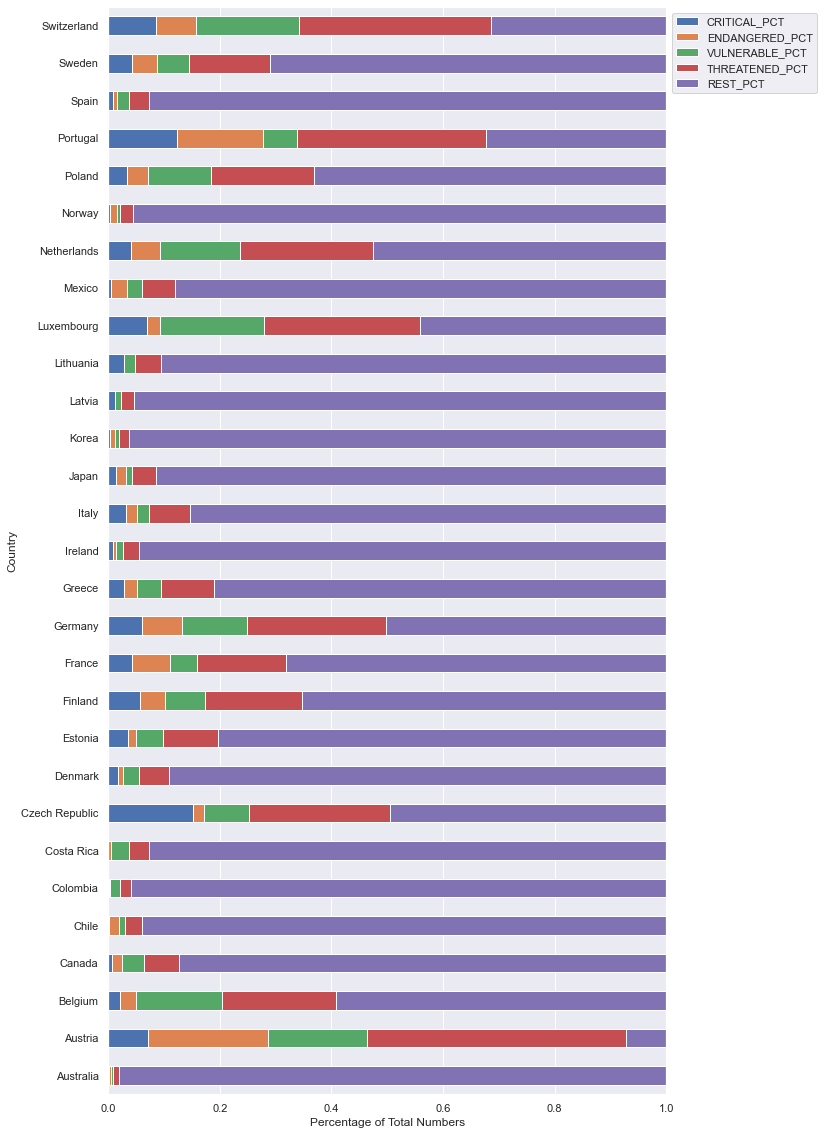

In [36]:
plt.rcParams["figure.figsize"] = (10,20)
df_fish_country_pct.plot.barh(alpha=1, stacked=True, rot=0)
plt.ylabel("Country")
plt.xlabel("Percentage of Total Numbers")
plt.xlim(0,1)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.savefig('bars_fish.png')

##### Interpretation:

Interesting to see is, that the Country with the highest proportion of endangered Fish is Austria, followed by Switzerland and Portugal. The total number of known fish in Austria is just 168, so if one species is endangered or threatened it will turn out in a higher proportion than in a country like Japan. Therefore we will have a closer look at how this is changing if we seperate the data between fish, marine and freshwater fish. Maybe there is too much bias in this plot.

#### Freshwater Fish

In [37]:
df_fish_country_fresh = df_incl_continent[(df_incl_continent.Species == 'Freshwater Fish')][['IUCN', 'Species', 'Country', 'Value']]
df_fish_country_fresh = df_fish_country_fresh.pivot_table(values='Value', index='Country', columns='IUCN', aggfunc='sum')
df_fish_country_fresh['REST'] = df_fish_country_fresh['TOT_KNOWN'] - df_fish_country_fresh['CRITICAL'] - df_fish_country_fresh['ENDANGERED']  - df_fish_country_fresh['VULNERABLE'] - df_fish_country_fresh['THREATENED']
df_fish_country_fresh = df_fish_country_fresh[['CRITICAL', 'ENDANGERED', 'VULNERABLE', 'THREATENED', 'REST', 'TOT_KNOWN']].dropna()

df_fish_country_fresh.head()

IUCN,CRITICAL,ENDANGERED,VULNERABLE,THREATENED,REST,TOT_KNOWN
Country,,,,,,
Australia,3.0,17.0,16.0,36.0,303.0,375.0
Austria,6.0,18.0,15.0,39.0,6.0,84.0
Belgium,1.0,1.0,13.0,15.0,13.0,43.0
Canada,6.0,14.0,16.0,36.0,93.0,165.0
Chile,1.0,23.0,13.0,37.0,-2.0,72.0


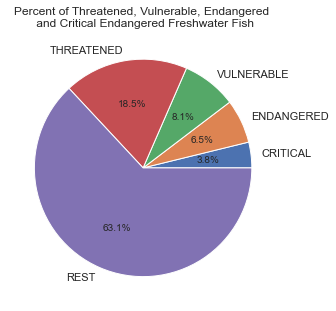

In [38]:
plt.rcParams["figure.figsize"] = (5,5)
df_fish_country_fresh[['CRITICAL', 'ENDANGERED', 'VULNERABLE', 'THREATENED', 'REST']].sum().plot.pie(autopct="%.1f%%", title="Percent of Threatened, Vulnerable, Endangered \n and Critical Endangered Freshwater Fish")
plt.ylabel(None)
plt.savefig('pie_fresh_fish.png')
plt.show()

In [39]:
df_fish_country_fresh_pct = df_calculate_percentages(df_fish_country_fresh)

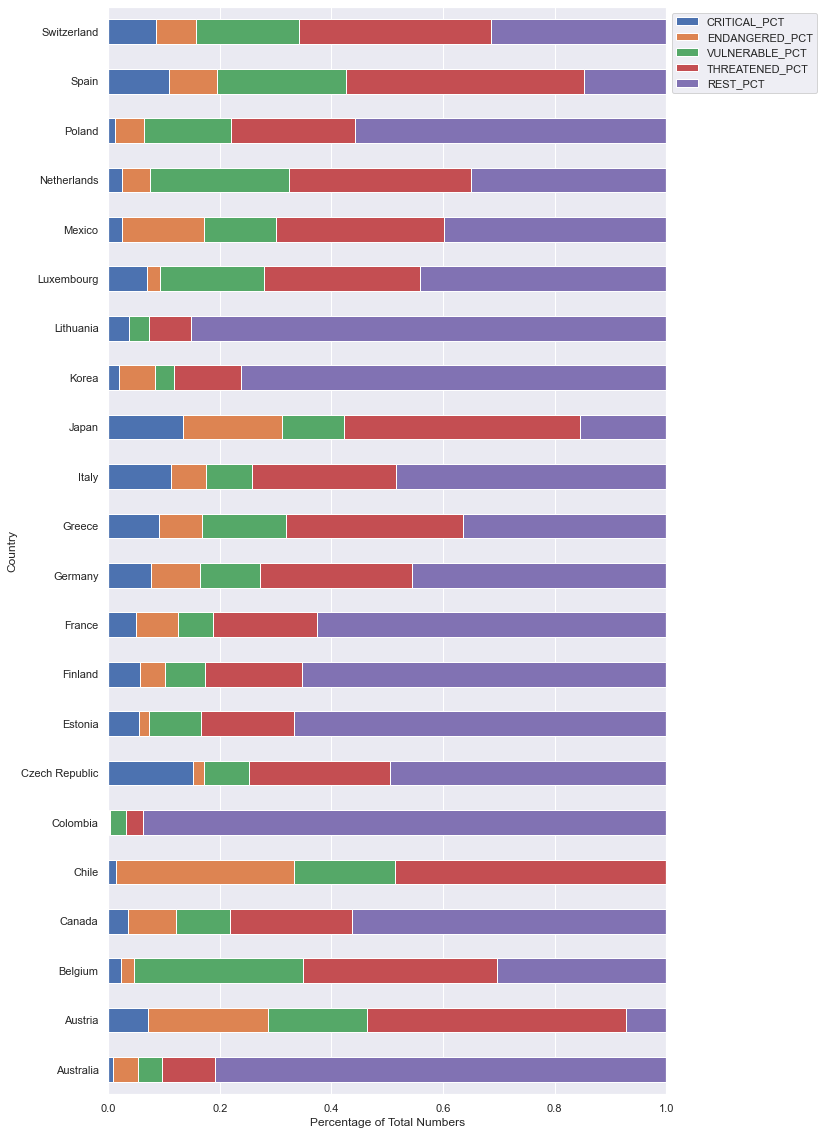

In [40]:
plt.rcParams["figure.figsize"] = (10,20)
df_fish_country_fresh_pct.plot.barh(alpha=1, stacked=True, rot=0)
plt.ylabel("Country")
plt.xlabel("Percentage of Total Numbers")
plt.xlim(0,1)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.savefig('bars_fresh_fish.png')

#### Marine Fish

In [41]:
df_fish_country_marine = df_incl_continent[(df_incl_continent.Species == 'Marine Fish')][['IUCN', 'Species', 'Country', 'Value']]
df_fish_country_marine = df_fish_country_marine.pivot_table(values='Value', index='Country', columns='IUCN', aggfunc='sum')
df_fish_country_marine['REST'] = df_fish_country_marine['TOT_KNOWN'] - df_fish_country_marine['CRITICAL'] - df_fish_country_marine['ENDANGERED']  - df_fish_country_marine['VULNERABLE'] - df_fish_country_marine['THREATENED']
df_fish_country_marine = df_fish_country_marine[['CRITICAL', 'ENDANGERED', 'VULNERABLE', 'THREATENED', 'REST', 'TOT_KNOWN']].dropna()

df_fish_country_marine.head()

IUCN,CRITICAL,ENDANGERED,VULNERABLE,THREATENED,REST,TOT_KNOWN
Country,,,,,,
Australia,4.0,2.0,8.0,14.0,5023.0,5051.0
Belgium,2.0,3.0,9.0,14.0,71.0,99.0
Canada,3.0,11.0,38.0,52.0,1107.0,1211.0
Colombia,1.0,2.0,9.0,12.0,2558.0,2582.0
Estonia,2.0,1.0,1.0,4.0,58.0,66.0


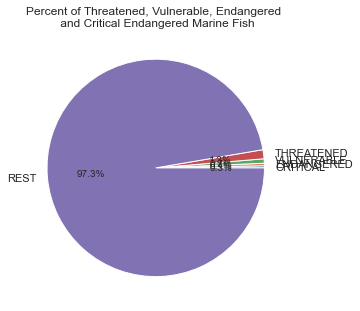

In [42]:
plt.rcParams["figure.figsize"] = (5,5)
df_fish_country_marine[['CRITICAL', 'ENDANGERED', 'VULNERABLE', 'THREATENED', 'REST']].sum().plot.pie(autopct="%.1f%%", title="Percent of Threatened, Vulnerable, Endangered \n and Critical Endangered Marine Fish")
plt.ylabel(None)
plt.savefig('pie_marine_fish.png')
plt.show()

In [43]:
df_fish_country_marine_pct = df_calculate_percentages(df_fish_country_marine)

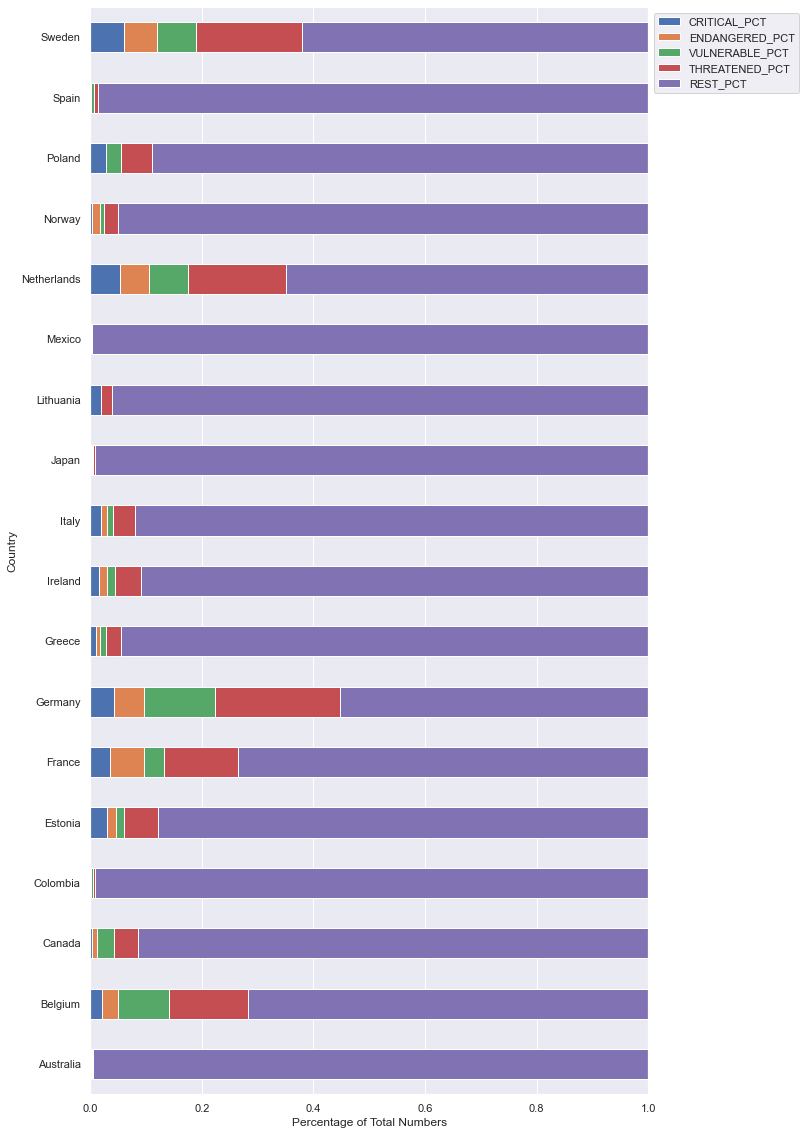

In [44]:
plt.rcParams["figure.figsize"] = (10,20)
df_fish_country_marine_pct.plot.barh(alpha=1, stacked=True, rot=0)
plt.ylabel("Country")
plt.xlabel("Percentage of Total Numbers")
plt.xlim(0,1)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.savefig('bars_marine_fish.png')

### Conclusion

#### Question 1: 
How has the population of endangered birds and fish has evolved over time and what are the current numbers in different regions?

#### Answer:
The population of endangered birds and fish have both inreased in the last years, but it is difficult to say how much of this effect is due to the assessment of new species. Therefore we can't say for sure by how much the number of endangered species has changed, but that the number is increasing. In addition we can say that the increase is higher for fish than for birds.

The current proportion of endangered and threatened fish and birds to their total number in different regions turned out in the fact, that the proportion is higher in Europe. Other continents have a lower proportion of endangered and threatened fish and birds. Especially in Western and Eastern Europe the proportion of endangered and threatened birds and fish are about 50%.

But as different countries are reporting their numbers of endangered specias in a different way we can not rely fully on these results. Especially when we look at the percentages of threatened fish per countries. There we can see that Austria has the highest percentage of in any kind endangered fish. But Austria is one of the countries with the lowest number of fish species overall. Furthermore we can also see a bias when we are not dividing in freshwater and marine fish. Because Austria just has freshwater fish and when we look at the differences between freshwater and marine fish percentages, the ones for freshwater fish are much higher than the ones for marine fish.

Therefore one conclusion is that freshwater fish are more endangered than marine fish.



# Question 2: Which geographical, natural and environmental characteristics predict a higherpercentage of endangered birds and fish in a country?

To gather the information needed to answer this question, we use seven datasets, that cover the following topics.

##### Dataset GREEN_GROWTH.csv
https://stats.oecd.org/Index.aspx?DataSetCode=GREEN_GROWTH

The OECD Green Growth database contains selected indicators for monitoring progress towards green growth to support policy making and inform the public at large. The conceptual framework is structured around four groups to capture the main features of green growth:

**Environmental and resource productivity:** indicate whether economic growth is becoming greener with more efficient use of natural capital and to capture aspects of production which are rarely quantified in economic models and accounting frameworks;

**The natural asset base:** indicate the risks to growth from a declining natural asset base;

**Environmental dimension of quality of life:** indicate how environmental conditions affect the quality of life and wellbeing of people;

**Economic opportunities and policy responses:** indicate the effectiveness of policies in delivering green growth and describe the societal responses needed to secure business and employment opportunities.


##### Dataset LAND_COVER.csv
https://stats.oecd.org/Index.aspx?DataSetCode=LAND_COVER

Loss of biodiversity and pressures on ecosystem services are among the most pressing global environmental challenges. Changes in land cover and land use are the leading contributors to terrestrial biodiversity loss.
This multi-class dataset allows for analysis of changes in land cover consistently at the global scale. It builds on decades of Earth observation missions by different national and supranational space organisations.
Loss of natural and semi-natural vegetated land is presented as a proxy for pressures on biodiversity and ecosystems. The indicator is defined as the percentage of tree cover, grassland, wetland, shrubland and sparse vegetation converted to any other land cover type. Gains of natural and semi-natural vegetated land are conversions in the opposite direction. 


##### Dataset LAND_USE.csv
https://stats.oecd.org/Index.aspx?DataSetCode=LAND_USE

Land resources are one of the four components of the natural environment: water, air, land and living resources. In this context land is both a physical "milieu" necessary for the development of natural vegetation as well as cultivated vegetation and a resource for human activities.
The data presented here give information concerning land use state and changes (e.g. agricultural land, forest land).


##### Dataset OCEAN.csv
https://stats.oecd.org/Index.aspx?DataSetCode=OCEAN

The ocean is a shared global resource. Ocean-related industries in many countries have expanded with insufficient consideration for the environment, risking the natural resources and the essential marine ecosystem services on which economies and people’s well-being depend.
The OECD Sustainable Ocean Economy Database synthesizes available ocean-related datasets and indicators from across the Organisation to improve their discoverability and comparability. 
The database structure follows the OECD’s Green Growth indicators framework. 
Indicators for the following main themes are provided:
1.	Natural capital of the ocean
2.	Environmental dimension of wellbeing and resilience in coastal communities
3.	Environmental and resource productivity of the ocean economy
4.	Economic opportunities from pursuing ocean sustainability
5.	Policy responses directed at ocean sustainability
6.	The socio-economic context


##### Dataset PROTECTED_AREAS.csv
https://stats.oecd.org/Index.aspx?DataSetCode=PROTECTED_AREAS  

This dataset answers the questions: how extensive are protected areas and what management objectives are pursued via protected area designation?
It includes country-level protected area coverage for terrestrial, marine and coastal domains calculated from the World Database on Protected Areas (WDPA) and provides disaggregations of protected area totals by IUCN management objective.


##### Dataset WATER_RESOURCES.csv
https://stats.oecd.org/Index.aspx?DataSetCode=WATER_RESOURCES

This dataset provides detailed statistics for several natural parameters of freshwater resources by long term annual average (with the shortest obersvation period being ten years in Belgium). These provide us with some information on meteorological and geographical data regarding water resources that we may use to build a clustering model.


We start by loading all datasets and then reduce to the countries, where species information is available.

In [45]:
df_animal = pd.read_csv("data/WILD_LIFE.csv",  sep=',', encoding = 'unicode_escape')
df_green = pd.read_csv("data/GREEN_GROWTH.csv", sep=',', encoding = 'unicode_escape')
df_land_cover = pd.read_csv("data/LAND_COVER.csv", sep=',', encoding = 'unicode_escape')
df_land_use = pd.read_csv("data/LAND_USE.csv", sep=',', encoding = 'unicode_escape')
df_ocean= pd.read_csv("data/OCEAN.csv", sep=',', encoding = 'unicode_escape')
df_protected = pd.read_csv("data/PROTECTED_AREAS.csv", sep=',', encoding = 'unicode_escape')
df_water = pd.read_csv("data/WATER_RESOURCES.csv", sep=',', encoding = 'unicode_escape')

In [46]:
countries = df_animal["Country"].unique()
df_green = df_green[df_green["Country"].isin(countries)]
df_land_use = df_land_use[df_land_use["Country"].isin(countries)]
df_land_cover = df_land_cover[df_land_cover["Country"].isin(countries)]
df_ocean = df_ocean[df_ocean["Country"].isin(countries)]
df_protected = df_protected[df_protected["Country"].isin(countries)]
df_water = df_water[df_water["Country"].isin(countries)]

In a next step we extract only the most recent data of each dataset. Since a few rows do not have complete data up to the most recent entries, we use cubic extrapolation to determine these values and guarantee comparable values.

**Green Growth**:
We use all parameters present in the dataset, the measures contain for example the `mean population exposure to pm2.5`, which are fine particles.

In [47]:
green_data = []
variables = df_green["VAR"].unique()
for var in variables:
    max_year = df_green["Year"][df_green["VAR"] == var].max()
    for country in countries:
        temp = df_green[["Year","Value"]][(df_green["VAR"] == var) & (df_green["Country"] == country)]
        if(max_year > temp["Year"].max()):
            temp = temp.append({'Year':max_year, 'Value':np.nan}, ignore_index = True)
            temp["Year"] = temp["Year"].astype(int)
            temp = temp.set_index("Year")
            def func(x, a, b, c, d):
                return(a * (x**3) + b * (x**2) + c * x + d)
            guess = (0.5,0.5,0.5,0.5)
            fit_df = temp.dropna()
            col_params = {}
            for col in fit_df.columns:
                # Get x & y
                x = fit_df.index.astype(float).values
                y = fit_df[col].values
                # Curve fit column and get curve parameters
                params = curve_fit(func, x, y, guess)
                # Store optimized parameters
                col_params[col] = params[0]
            for col in temp.columns:
                # Get the index values for NaNs in the column
                x = temp[temp.isnull()].index.astype(float).values
                # Extrapolate those points with the fitted function
                temp[col][x] = func(x, *col_params[col])
            # get last entry
        value = temp.iloc[-1]["Value"]
        green_data.append([max_year, country, var, value])

C:\Users\Admin\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


**Land Cover** and **Land Use**:
These datasets contain measure of what type of land is present in a given country (forest, shrubland, wetland, ...) and what the land is used for (cropland, meadows, ...).

For both datasets the information is available as absolute value and percentage of total land. We chose to use only the percentage to accomodate to the different sizes of countries represented.

In [48]:
land_cover_data = []
variables = df_land_cover["VARIABLE"][df_land_cover["MEAS"] == "PCNT"].unique()
df_land_cover = df_land_cover[df_land_cover["MEAS"] == "PCNT"]
for var in variables:
    max_year = 2019
    for country in countries:
        temp = df_land_cover[["Year","Value"]][(df_land_cover["VARIABLE"]==var)&(df_land_cover["Country"]==country)]
        temp = temp.set_index("Year")
        value = temp.iloc[-1]["Value"]
        land_cover_data.append([max_year, country, var, value])

In [49]:
land_use_data = []
df_land_use = df_land_use[df_land_use["Unit"] == "Percentage"]
variables = df_land_use['VAR'].unique()
for var in variables:
    max_year = 2019
    for country in countries:
        temp = df_land_use[["Year","Value"]][(df_land_use["VAR"]==var)&(df_land_use["Country"]==country)]
        temp = temp.set_index("Year")
        if(len(temp) != 0):
            value = temp.iloc[-1]["Value"]
        else:
            value = 0.0
        land_use_data.append([max_year, country, var, value])

**Protected areas**: 
Contains information about how much area of a country is environmentally protected. Given as percentage of total area.

In [50]:
protected_data = []
for country in countries:
    max_year = df_protected["Year"][df_protected["Country"]==country].max()
    temp = df_protected[["Year","Value"]][(df_protected["Country"]==country)]
    temp = temp.set_index("Year")
    if(len(temp) != 0):
        value = temp.iloc[-1]["Value"]
    else:
        value = np.nan
    protected_data.append([max_year, country, 'Percent of protected area', value])

**Ocean**:
This large dataset contains 77 parameters, from which we chose to investigate the following:

- International Marine bunker CO2 emissions as share of total
- Total marine protected areas as share of exclusive economic zone
- Total protected area within 1km of coastline as share of total
- Total protected area within 10km of coastline as share of total
- Total aquacultural production, marine and partly marine species, thousand tonnes

In [51]:
ocean_data = []
variables = ['MARBUNK_TFC_SHARE',
             'PAS_COAST_1KM_PCNT',
             'PAS_COAST_10KM_PCNT',
             'AQUACUL_MARINE_SPECIES_USD',
             'PAS_ALL_MAR_PCNT']
for var in variables:
    for country in countries:
        max_year = df_ocean["Year"][df_ocean["Country"]==country].max()
        temp = df_ocean[["Year","Value"]][(df_ocean["Country"]==country)&(df_ocean["VARIABLE"] == var)]
        temp = temp.set_index("Year")
        if(len(temp) != 0):
            value = temp.iloc[-1]["Value"]
        else:
            value = 0.0
        ocean_data.append([max_year, country, var, value])

**Freshwater**:
We use only the variable `GROUND_RESOU` from this dataset, since all other variables are abstracted from this one and therefore perfectly correlated.

In [52]:
water_data = []
variables = ['GROUND_RESOU']
for var in variables:
    for country in countries:
        max_year = df_water["Year"][df_water["Country"]==country].max()
        temp = df_water[["Value"]][(df_water["Country"]==country)]
        if(len(temp) != 0):
            value = temp.iloc[-1]["Value"]
        else:
            value = np.nan
        # the data is given as a long term average, for easier merging we append the current year
        water_data.append([2022, country, var, value])

**Wildlife**:
We extract the data of endangered birds and fish in two different dataframes and merge all gathered parameters into those.

In [53]:
def wildlife_data_gen(orig_df: pd.DataFrame, year: int):
    output_data = []
    df_reduced = orig_df.reset_index()
    variables = df_reduced.columns[1:]
    countries = df_reduced["Country"].unique()
    df_reduced = df_reduced.loc[df_reduced["Country"].isin(countries)]
    
    for var in variables:
        for country in countries:
            temp = df_reduced[[var]][(df_reduced["Country"]==country)]
            if(len(temp) != 0):
                value = temp.iloc[-1][var]
            else:
                value = np.nan
            output_data.append([year, country, var, value])
    return output_data

# as mentioned in task 1, the data from WILD_LIFE.csv used is from 2021
bird_data = wildlife_data_gen(df_birds_country.copy(), 2021)
fish_data = wildlife_data_gen(df_fish_country.copy(), 2021)

In [54]:
def data_merger(orig_list: list, countries: list):
    output_df = pd.DataFrame()
    variables = list({line[2] for line in orig_list})
    output_df = pd.DataFrame(index = countries, columns = variables)
    for line in orig_list:
        output_df.at[str(line[1]), str(line[2])] = float(line[3])
    return output_df

Next, we will create the dataframes used for the next several operations. For this, we are first going to check if our data on fishes and birds is consistent on which countries are represented. From that we will find out if we can work with the same base for both analyses.

In [55]:
countries_bird = list({line[1] for line in bird_data}) 
countries_fish = list({line[1] for line in fish_data})

if countries_bird == countries_fish:
    print("Fish and Bird data contain same countries.")
else:
    print("Fish and Bird data do not contain the same countries.")

Fish and Bird data do not contain the same countries.


In [56]:
# both datasets do not contain information on the same countries, hence we use different lists for both cycles.    
# now, we merge all the data
data_list = [water_data, ocean_data, protected_data, land_use_data, land_cover_data, green_data]

data_dfs_fish = [data_merger(data, countries_fish) for data in data_list]
data_dfs_bird = [data_merger(data, countries_bird) for data in data_list]

df_fish = data_merger(fish_data.copy(), countries_fish)
df_bird = data_merger(bird_data.copy(), countries_bird)

For now, we are going to create a dataframe holding every variable.

In [57]:
def df_full_gen(orig_df: pd.DataFrame, dfs: list):
    output = orig_df
    for df_name in dfs:
        output = output.join(df_name)
    return output

df_fish_full = df_full_gen(df_fish.copy(), data_dfs_fish).sort_index()
df_bird_full = df_full_gen(df_bird.copy(), data_dfs_bird).sort_index()

In [58]:
display(df_fish_full.head())
display(df_bird_full.head())

,CRITICAL,VULNERABLE,THREATENED,ENDANGERED,REST,TOT_KNOWN,GROUND_RESOU,AQUACUL_MARINE_SPECIES_USD,PAS_COAST_10KM_PCNT,PAS_ALL_MAR_PCNT,...,URBAN,WETL,CROPL,FOREST,PM_PWM,DMC_PROD,GPAT_DE_AT,EAMFP_EAMFPG,LCC_NATGAIN92,CO2_PBPROD
Australia,14,48,100,38,10531,10731,407.676,972.565,38.04,40.95,...,0.161705,1.30339,8.17845,11.8787,6.7487,1.65556,9.06,1.97496,0.971938,3.13508
Austria,12,30,78,36,12,168,86,26.0843,0,0,...,2.80908,0.150062,22.9326,53.6331,12.2249,3.26553,13.58,0.174061,1.76555,7.66453
Belgium,6,44,58,8,168,284,25.7646,0.24409,43.64,35.96,...,11.3557,0.333099,50.5799,22.5958,12.7263,5.08026,10.45,0.499876,2.5269,6.2469
Canada,18,108,176,50,2400,2752,3478,1086.91,9.43,2.8,...,0.128233,0.824262,5.78259,46.9648,7.09026,1.92356,10.27,0.950586,0.309103,3.13414
Chile,2,28,76,46,2374,2526,1007.49,10499,33.39,40.61,...,0.385536,0.0413074,6.61623,30.9589,23.6832,0.62649,19.45,-0.0957566,2.56074,5.19292


,CRITICAL,VULNERABLE,THREATENED,ENDANGERED,REST,TOT_KNOWN,GROUND_RESOU,AQUACUL_MARINE_SPECIES_USD,PAS_COAST_10KM_PCNT,PAS_ALL_MAR_PCNT,...,URBAN,WETL,CROPL,FOREST,PM_PWM,DMC_PROD,GPAT_DE_AT,EAMFP_EAMFPG,LCC_NATGAIN92,CO2_PBPROD
Australia,17,63,135,55,529,799,407.676,972.565,38.04,40.95,...,0.161705,1.30339,8.17845,11.8787,6.7487,1.65556,9.06,1.97496,0.971938,3.13508
Austria,14,28,66,24,81,213,86,26.0843,0,0,...,2.80908,0.150062,22.9326,53.6331,12.2249,3.26553,13.58,0.174061,1.76555,7.66453
Belgium,20,20,55,15,88,198,25.7646,0.24409,43.64,35.96,...,11.3557,0.333099,50.5799,22.5958,12.7263,5.08026,10.45,0.499876,2.5269,6.2469
Canada,26,48,88,14,498,674,3478,1086.91,9.43,2.8,...,0.128233,0.824262,5.78259,46.9648,7.09026,1.92356,10.27,0.950586,0.309103,3.13414
Chile,2,19,46,25,418,510,1007.49,10499,33.39,40.61,...,0.385536,0.0413074,6.61623,30.9589,23.6832,0.62649,19.45,-0.0957566,2.56074,5.19292


We use a dictionary of all parameters for better readability and as a lookup tool.

In [59]:
def var_dict_gen(orig_df: pd.DataFrame, var_short: str, var_long: str):
    var_s = orig_df[var_short].unique()
    var_l = orig_df[var_long].unique()
    return {var_1: var_2 for var_1, var_2 in zip(var_s, var_l)}

land_cover_dict = var_dict_gen(df_land_cover, "VARIABLE", "Land cover class")
green_dict = var_dict_gen(df_green, "VAR", "Variable")
land_use_dict = var_dict_gen(df_land_use, "VAR", "Variable")
water_dict = var_dict_gen(df_water, "VAR", "Variable")
ocean_dict = var_dict_gen(df_ocean, "VARIABLE", "Variable")
protected_dict = {"Percent of protected area": "Percent of protected area"}

var_dict = dict(sorted({**land_cover_dict, **green_dict, **land_use_dict, **water_dict, **ocean_dict, **protected_dict}.items()))

display(var_dict)

{'AQUACUL_MARINE_SPECIES_TONNE': 'Total aquaculture production, marine and partly-marine species, thousand tonnes',
 'AQUACUL_MARINE_SPECIES_USD': 'Total aquaculture production, marine and partly-marine species, million USD',
 'AQUIFER_RESOU': 'Recharge into the Aquifer',
 'ARABLE_P': 'Arable and cropland % land area',
 'BARE': 'Bare area',
 'BASE_ERTR': 'Ocean-related tax revenue as share of environmentally related tax revenue, %',
 'BASE_GDP': 'Ocean-related tax revenue as share of GDP, %',
 'BASE_PPP': 'Ocean-related tax revenue, million USD 2010 PPP',
 'BASE_REV': 'Ocean-related tax revenue as share of total tax revenue, %',
 'CO2_PBPROD': 'Production-based CO2 productivity, GDP per unit of energy-related CO2 emissions',
 'COASTAL_100_POP_PC': 'Population resident within 100km of coast as share of total population, %',
 'COASTAL_100_POP_SCALED': 'Population resident within 100km of coast, millions',
 'COASTAL_10_POP_PC': 'Population resident within 10km of coast as share of total p

For more easy investigation, we will merge the "THREATENED", "ENDANGERED", "VULNERABLE, and "CRITICAL" columns of the wild life data. We will map them by looking at the relative number of (at least) threatened species per country.

In [60]:
df_bird_full = df_bird_full.reset_index()
df_bird_full = df_bird_full.rename(columns={"index": "Country"})

df_fish_full = df_fish_full.reset_index()
df_fish_full = df_fish_full.rename(columns={"index": "Country"})

In [61]:
df_bird_rel = df_bird_full.copy()

df_bird_rel["THREAT+%"] = df_bird_rel[['THREATENED', 'ENDANGERED', 'VULNERABLE', 'CRITICAL']].sum(axis=1) / df_bird_rel["TOT_KNOWN"] * 100
df_bird_rel = df_bird_rel.drop(["Country", "VULNERABLE", "REST", "CRITICAL", "THREATENED", "ENDANGERED", "TOT_KNOWN"], 1)

In [62]:
df_fish_rel = df_fish_full.copy()

df_fish_rel["THREAT+%"] = df_fish_rel[['THREATENED', 'ENDANGERED', 'VULNERABLE', 'CRITICAL']].sum(axis=1) / df_fish_rel["TOT_KNOWN"] * 100

df_fish_rel = df_fish_rel.drop(["Country", "VULNERABLE", "REST", "CRITICAL", "THREATENED", "ENDANGERED", "TOT_KNOWN"], 1)

**Feature Selection with backpropagation**

In a next step we keep those features, that have the most predictional power for our data using a backpropagation approach. As significance value we use $p = 0.05$ to determine significance parameters, based on a least square regression.

In [63]:
def significant_params_gen(obs_df, target, psig):
    cols = list(obs_df.columns)

    while (len(cols) > 0):
        next_df = obs_df[cols]
        next_df = sm.add_constant(next_df)
        model = sm.OLS(target.astype(float), next_df.astype(float), missing="drop")
        result = model.fit()
        p = pd.Series(result.pvalues.values[1:], index=cols)
        pmax = max(p)
        feature_with_p_max = p.idxmax()
        if pmax > psig:
            cols.remove(feature_with_p_max)
        else:
            break
    return cols

We separate our observations and target value, use imputation to deal with missing values and normalize the data to prepare it for the backpropagation.

In [64]:
norm_bird = (df_bird_rel - df_bird_rel.mean())/df_bird_rel.std()
norm_fish = (df_fish_rel - df_fish_rel.mean())/df_fish_rel.std()

for col in norm_bird.columns:
    norm_bird[col] = norm_bird[col].fillna(norm_bird[col].median())

for col in norm_fish.columns:
    norm_fish[col] = norm_fish[col].fillna(norm_fish[col].median())

obs_bird_rel = norm_bird.drop("THREAT+%", 1)
bird_target_rel = norm_bird["THREAT+%"]

obs_fish_rel = norm_fish.drop("THREAT+%", 1)
fish_target_rel = norm_fish["THREAT+%"]

bird_vars_rel = significant_params_gen(obs_bird_rel, bird_target_rel, 0.05)
fish_vars_rel = significant_params_gen(obs_fish_rel, fish_target_rel, 0.05)

Our most significant variables therefore are the following.

In [65]:
print("For birds:")
display([var_dict[var] for var in bird_vars_rel])
print("For fish:")
display([var_dict[var] for var in fish_vars_rel])

For birds:


['Groundwater for abstraction',
 'Total aquaculture production, marine and partly-marine species, million USD',
 'Total protected area within 10km of coastline (both terrestrial and marine) as share of 10km buffer area, %',
 'Total marine protected areas as share of exclusive economic zone, %',
 'International marine bunker CO2 emissions as share of CO2 emissions from total CO2 from fuel combustion and international bunkers, %',
 'Percent of protected area',
 'Forest % land area',
 'Bare area',
 'Shrubland',
 'Artificial surfaces',
 'Wetland',
 'Cropland',
 'Tree cover',
 'Mean population exposure to PM2.5',
 'Non-energy material productivity, GDP per unit of DMC',
 'Production-based CO2 productivity, GDP per unit of energy-related CO2 emissions']

For fish:


['Groundwater for abstraction',
 'Total aquaculture production, marine and partly-marine species, million USD',
 'Other % land area',
 'Sparse vegetation',
 'Wetland',
 'Cropland']

We can also take a look at the parameters, which appear to be significant in both models. 
These would be the following.

In [66]:
display([var_dict[var] for var in (set(bird_vars_rel) & set(fish_vars_rel))])

['Total aquaculture production, marine and partly-marine species, million USD',
 'Wetland',
 'Cropland',
 'Groundwater for abstraction']

#### Analysis

It seems, that for birds especially the land cover is important, whereas for fish fishery seems to be important.

**I do not think this code is needed, but I don't want to delete it just now**

```
df_bird_abs = df_bird_full.copy()

df_bird_abs["THREAT+"] = df_bird_abs[['THREATENED', 'ENDANGERED', 'VULNERABLE', 'CRITICAL']].sum(axis=1)
df_bird_abs = df_bird_abs.drop(["Country", "VULNERABLE", "REST", "CRITICAL", "THREATENED", "ENDANGERED", "TOT_KNOWN"], 1)

df_fish_abs = df_fish_full.copy()

df_fish_abs["THREAT+"] = df_fish_abs[['THREATENED', 'ENDANGERED', 'VULNERABLE', 'CRITICAL']].sum(axis=1)
df_fish_abs = df_fish_abs.drop(["Country", "VULNERABLE", "REST", "CRITICAL", "THREATENED", "ENDANGERED", "TOT_KNOWN"], 1)

norm_bird = (df_bird_abs - df_bird_abs.mean())/df_bird_abs.std()
norm_fish = (df_fish_abs - df_fish_abs.mean())/df_fish_abs.std()

for col in norm_bird.columns:
    norm_bird[col] = norm_bird[col].fillna(norm_bird[col].median())

for col in norm_fish.columns:
    norm_fish[col] = norm_fish[col].fillna(norm_fish[col].median())

obs_bird_abs = norm_bird.drop("THREAT+", 1)
bird_target_abs = norm_bird["THREAT+"]

obs_fish_abs = norm_fish.drop("THREAT+", 1)
fish_target_abs = norm_fish["THREAT+"]

bird_vars_abs = significant_params_gen(obs_bird_abs, bird_target_abs, 0.05)
fish_vars_abs = significant_params_gen(obs_fish_abs, fish_target_abs, 0.05)
display(bird_vars_abs)
display(fish_vars_abs)
```

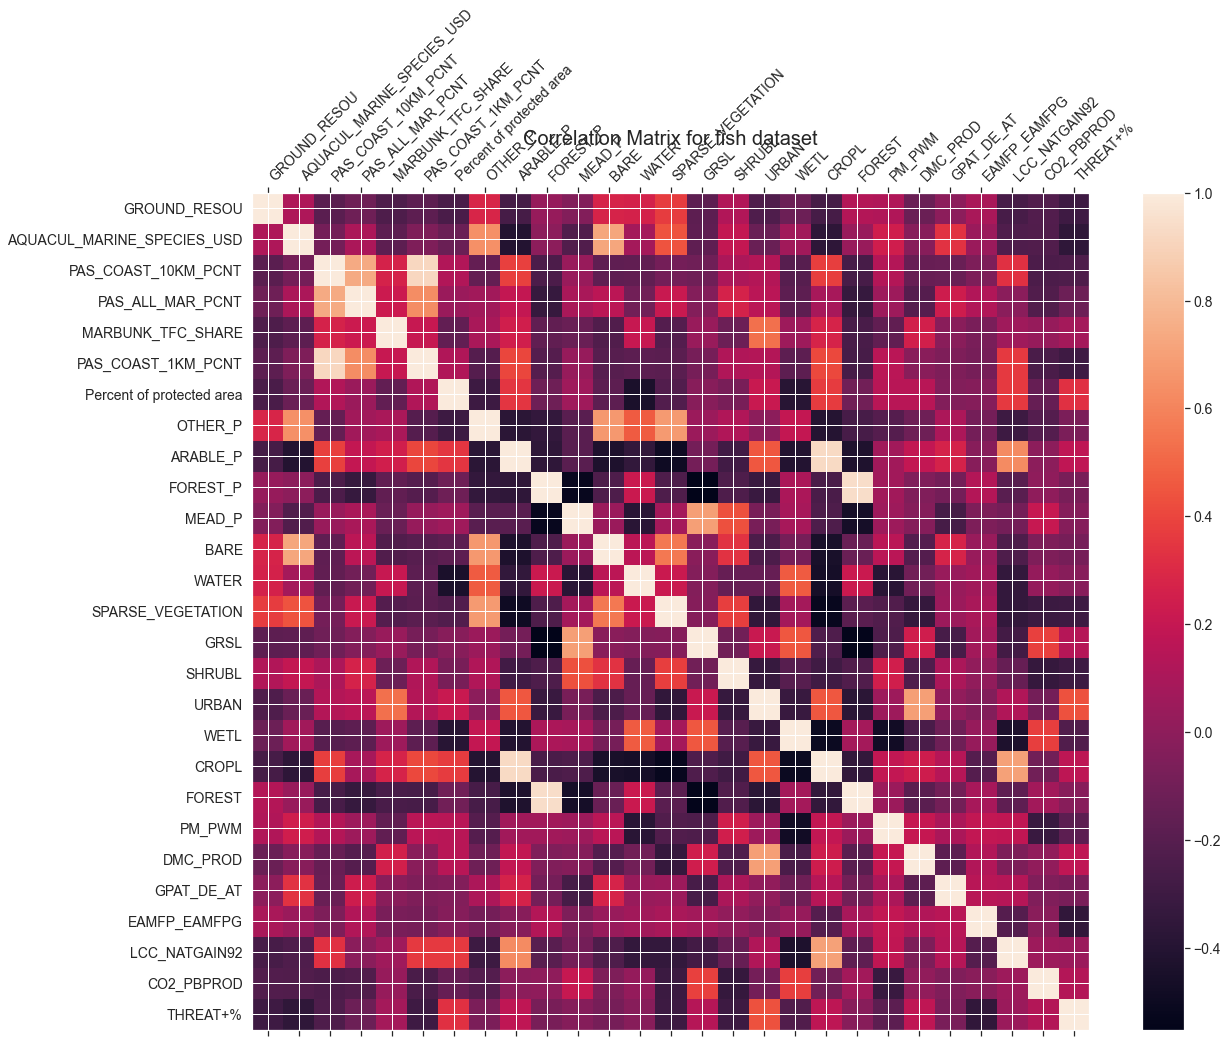

In [67]:
df_fish_rel = df_fish_rel.astype(float)
f = plt.figure(figsize=(19,15))
plt.matshow(df_fish_rel.corr(), fignum=f.number)
plt.xticks(range(df_fish_rel.select_dtypes(['number']).shape[1]), df_fish_rel.select_dtypes(['number']).columns, fontsize=14, rotation=45, ha="left")
plt.yticks(range(df_fish_rel.select_dtypes(['number']).shape[1]), df_fish_rel.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix for fish dataset', fontsize=20);

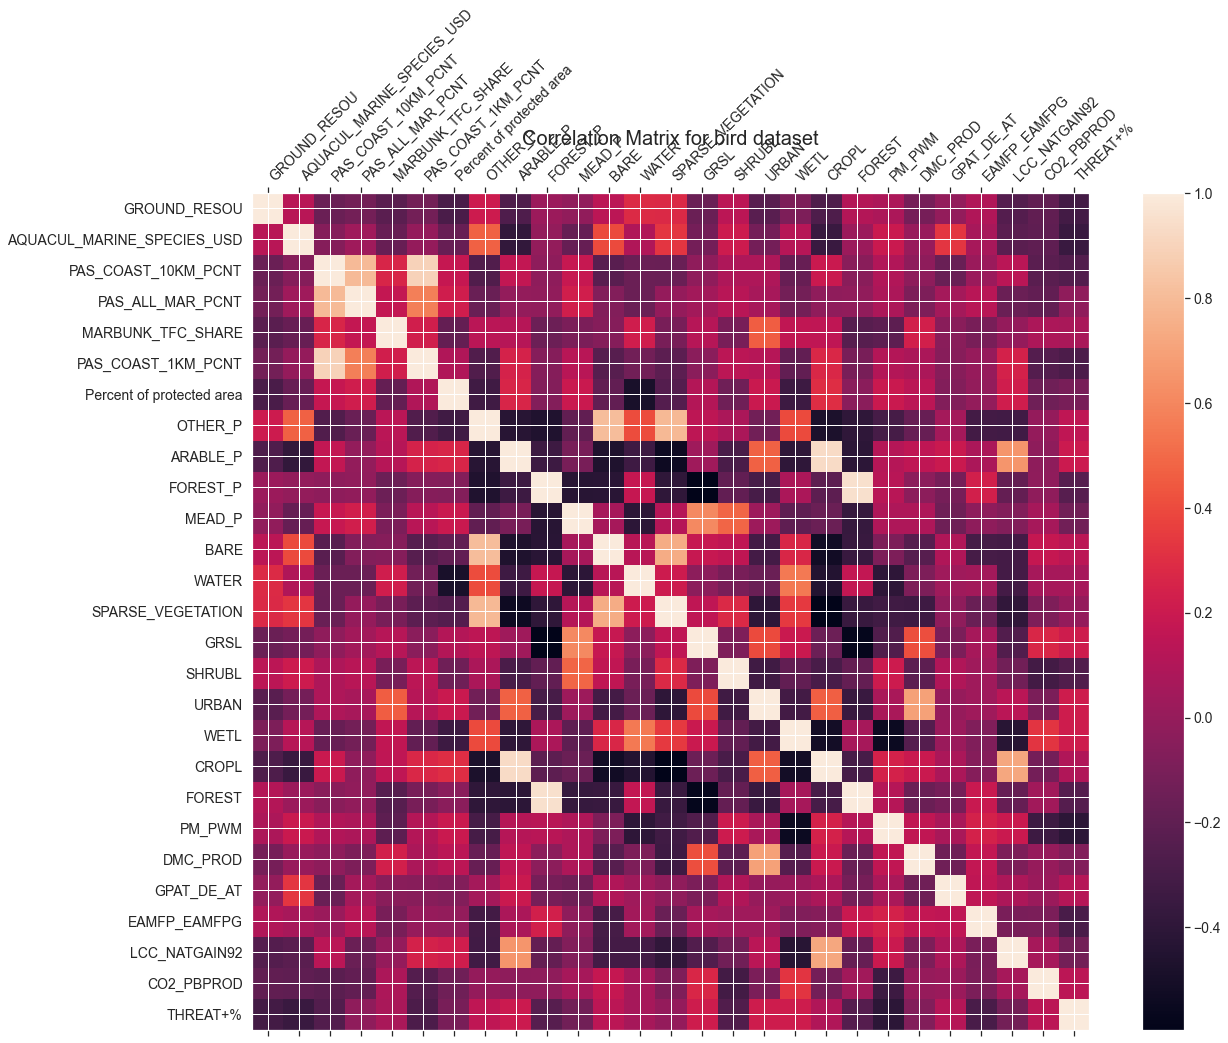

In [68]:
df_bird_rel = df_bird_rel.astype(float)
f = plt.figure(figsize=(19,15))
plt.matshow(df_bird_rel.corr(), fignum=f.number)
plt.xticks(range(df_bird_rel.select_dtypes(['number']).shape[1]), df_bird_rel.select_dtypes(['number']).columns, fontsize=14, rotation=45, ha="left")
plt.yticks(range(df_bird_rel.select_dtypes(['number']).shape[1]), df_bird_rel.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix for bird dataset', fontsize=20);

We will now calculate a clustering for the generated significant parameters. For visualization, we will also use Principal Component Analysis in order to reduce our problem to two dimensions.

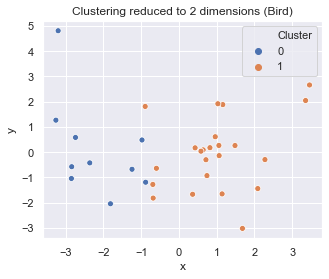

,Cluster,THREAT+%,Country
0,0,33.792240,Australia
1,1,61.971831,Austria
2,1,55.555556,Belgium
3,0,26.112760,Canada
4,0,18.039216,Chile
5,0,13.920164,Colombia
6,1,6.756757,Costa Rica
7,1,97.046414,Czech Republic
8,1,69.709544,Denmark
9,0,81.196581,Estonia


In [69]:
pd.options.mode.chained_assignment = None

plt.figure(figsize=(5,4))
df_bird_sig = obs_bird_rel[bird_vars_rel]

kmeans = KMeans(n_clusters=2)

reduced_bird_sig = PCA(n_components=2).fit_transform(df_bird_sig)
results = pd.DataFrame(reduced_bird_sig,columns=['x','y'])
df_bird_sig['Cluster'] = kmeans.fit_predict(df_bird_sig)

sns.scatterplot(x="x", y="y", hue=df_bird_sig['Cluster'], data=results)
plt.title('Clustering reduced to 2 dimensions (Bird)')
plt.show()

df_bird_sig = df_bird_sig.join(df_bird_rel["THREAT+%"])
df_bird_sig = df_bird_sig.join(df_bird_full["Country"])
display(df_bird_sig[["Cluster", "THREAT+%", "Country"]])

pd.options.mode.chained_assignment = "warn"

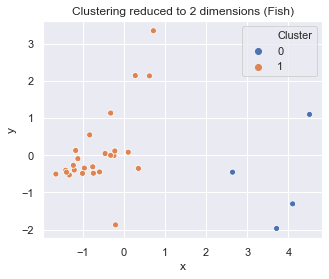

,Cluster,THREAT+%,Country
0,0,1.863759,Australia
1,1,92.857143,Austria
2,1,40.845070,Belgium
3,0,12.790698,Canada
4,0,6.017419,Chile
5,1,4.103053,Colombia
6,1,7.411444,Costa Rica
7,1,50.505051,Czech Republic
8,1,10.921502,Denmark
9,1,19.730942,Estonia


In [70]:
pd.options.mode.chained_assignment = None

plt.figure(figsize=(5,4))
df_fish_sig = obs_fish_rel[fish_vars_rel]

kmeans = KMeans(n_clusters=2)

reduced_fish_sig = PCA(n_components=2).fit_transform(df_fish_sig)
results = pd.DataFrame(reduced_fish_sig,columns=['x','y'])
df_fish_sig['Cluster'] = kmeans.fit_predict(df_fish_sig)

sns.scatterplot(x="x", y="y", hue=df_fish_sig['Cluster'], data=results)
plt.title('Clustering reduced to 2 dimensions (Fish)')
plt.show()

df_fish_sig = df_fish_sig.join(df_fish_rel["THREAT+%"])
df_fish_sig = df_fish_sig.join(df_fish_full["Country"])
display(df_fish_sig[["Cluster", "THREAT+%", "Country"]])

pd.options.mode.chained_assignment = "warn"

The clustering seems to not fit too well to the Endangerment data. Next, we will try to polish our search for significant parameters by performing a backpropagation multiple times over a random subset of your input parameters.

In [71]:
print(len(obs_bird_rel.columns))

26


In [72]:
def sig_param_dict_gen(obs_df: pd.DataFrame, target: pd.DataFrame, runs=100, n_params=17):
    output = {param: 0 for param in obs_df}

    for _ in range(runs):
        obs_sample = obs_df.sample(n=n_params, axis="columns")
        iter_sig_params = significant_params_gen(obs_sample, target, 0.05)
        for var in iter_sig_params:
            output[var] += 1
    return dict(sorted(output.items(), key=lambda item: item[1]))

In [73]:
def get_top_params(params: dict, top_n=5):
    if top_n <= len(params):
        return [item for item in sorted(params, key=params.get, reverse=True)[:top_n]]
    else:
        return sorted(list(params))

In [74]:
bird_param_dict = sig_param_dict_gen(obs_bird_rel, bird_target_rel)
display("Bird Params:")
display(bird_param_dict)

fish_param_dict = sig_param_dict_gen(obs_fish_rel, fish_target_rel)
display("Fish Params:")
display(fish_param_dict)

'Bird Params:'

{'SHRUBL': 0,
 'DMC_PROD': 0,
 'GPAT_DE_AT': 1,
 'WATER': 2,
 'URBAN': 2,
 'PAS_COAST_1KM_PCNT': 3,
 'WETL': 4,
 'CO2_PBPROD': 4,
 'BARE': 5,
 'GRSL': 5,
 'MARBUNK_TFC_SHARE': 6,
 'Percent of protected area': 6,
 'FOREST': 6,
 'GROUND_RESOU': 11,
 'CROPL': 13,
 'FOREST_P': 16,
 'LCC_NATGAIN92': 16,
 'OTHER_P': 18,
 'SPARSE_VEGETATION': 18,
 'MEAD_P': 19,
 'ARABLE_P': 24,
 'PM_PWM': 32,
 'EAMFP_EAMFPG': 32,
 'PAS_COAST_10KM_PCNT': 38,
 'PAS_ALL_MAR_PCNT': 41,
 'AQUACUL_MARINE_SPECIES_USD': 46}

'Fish Params:'

{'CO2_PBPROD': 1,
 'PM_PWM': 2,
 'MARBUNK_TFC_SHARE': 4,
 'DMC_PROD': 4,
 'LCC_NATGAIN92': 4,
 'GPAT_DE_AT': 5,
 'WATER': 6,
 'Percent of protected area': 11,
 'ARABLE_P': 11,
 'SHRUBL': 11,
 'FOREST_P': 13,
 'FOREST': 15,
 'OTHER_P': 16,
 'PAS_COAST_10KM_PCNT': 17,
 'PAS_ALL_MAR_PCNT': 17,
 'CROPL': 19,
 'BARE': 20,
 'SPARSE_VEGETATION': 21,
 'GRSL': 27,
 'GROUND_RESOU': 28,
 'MEAD_P': 32,
 'WETL': 36,
 'URBAN': 42,
 'AQUACUL_MARINE_SPECIES_USD': 48,
 'PAS_COAST_1KM_PCNT': 50,
 'EAMFP_EAMFPG': 60}

In [75]:
top_sig_params_bird = get_top_params(bird_param_dict)
top_sig_params_fish = get_top_params(fish_param_dict)

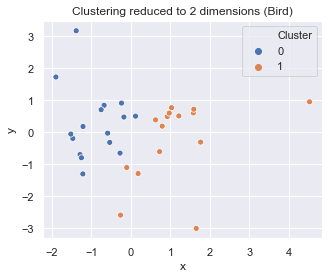

,Cluster,THREAT+%,Country
0,1,33.792240,Australia
1,0,61.971831,Austria
2,1,55.555556,Belgium
3,0,26.112760,Canada
4,1,18.039216,Chile
5,1,13.920164,Colombia
6,0,6.756757,Costa Rica
7,0,97.046414,Czech Republic
8,0,69.709544,Denmark
9,0,81.196581,Estonia


In [76]:
pd.options.mode.chained_assignment = None

plt.figure(figsize=(5,4))
df_bird_top_sig = obs_bird_rel[top_sig_params_bird]

kmeans = KMeans(n_clusters=2)

reduced_bird_top_sig = PCA(n_components=2).fit_transform(df_bird_top_sig)
results = pd.DataFrame(reduced_bird_top_sig,columns=['x','y'])
df_bird_top_sig['Cluster'] = kmeans.fit_predict(df_bird_top_sig)

sns.scatterplot(x="x", y="y", hue=df_bird_top_sig['Cluster'], data=results)
plt.title('Clustering reduced to 2 dimensions (Bird)')
plt.show()

df_bird_top_sig = df_bird_top_sig.join(df_bird_rel["THREAT+%"])
df_bird_top_sig = df_bird_top_sig.join(df_bird_full["Country"])
display(df_bird_top_sig[["Cluster", "THREAT+%", "Country"]])

pd.options.mode.chained_assignment = "warn"

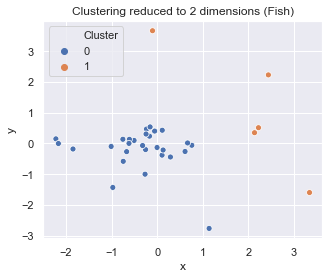

,Cluster,THREAT+%,Country
0,0,33.792240,Australia
1,0,61.971831,Austria
2,0,55.555556,Belgium
3,0,26.112760,Canada
4,0,18.039216,Chile
5,0,13.920164,Colombia
6,0,6.756757,Costa Rica
7,0,97.046414,Czech Republic
8,0,69.709544,Denmark
9,0,81.196581,Estonia


In [77]:
pd.options.mode.chained_assignment = None

plt.figure(figsize=(5,4))
df_fish_top_sig = obs_bird_rel[top_sig_params_fish]

kmeans = KMeans(n_clusters=2)

reduced_fish_top_sig = PCA(n_components=2).fit_transform(df_fish_top_sig)
results = pd.DataFrame(reduced_fish_top_sig,columns=['x','y'])
df_fish_top_sig['Cluster'] = kmeans.fit_predict(df_fish_top_sig)

sns.scatterplot(x="x", y="y", hue=df_fish_top_sig['Cluster'], data=results)
plt.title('Clustering reduced to 2 dimensions (Fish)')
plt.show()

df_fish_top_sig = df_fish_top_sig.join(df_bird_rel["THREAT+%"])
df_fish_top_sig = df_fish_top_sig.join(df_bird_full["Country"])
display(df_fish_top_sig[["Cluster", "THREAT+%", "Country"]])

pd.options.mode.chained_assignment = "warn"

# Difficulties in analysing the data?

# What were the key insights and potential biases?

# Question 3: How unlikely will it be to encounter threatened fish species in the future?

As the data shows, there is an increasing trend of endangered species of fish and birds throughout the entire world. The fish being the most endangered, we will futher focus on building a prediction model through which we can asses the risk of extinction of those species. <br>

In the beginning, we tried coming up with a prediction model for all endangered fish species from all over the world. However, since there is no public worlwide fish population dataset, we further focus our observation on just one country, namely United Kingdom. Using data about early fish count from different species, our prediction model will approximate the future evolution of all fish species found in the United Kingdom, which will allow us to identify which and approximately when endangered species will be extinct, if the current state of the envirnoment persists. While training the prediction model, we will use additional data: water quality traits, fishery and climate change.


### Load  datasets


As a first step, we load the dataset with all fish observation from UK [1] and a combined red list of fish species [2] [3] in order to identify which species to look for. <br> <br>
[1] https://environment.data.gov.uk/portalstg/home/item.html?id=ef5b68b0ceda42c39ee063392bb535de <br>
[2] https://ec.europa.eu/environment/nature/conservation/species/redlist/downloads/European_marine_fishes.pdf <br>
[3] https://www.kaggle.com/harshithgupta/endangered-fish-data?select=Combined_Less.csv

In [78]:
# UK's fish dataset
df_fishCounts = pd.read_csv("data/fish_count_uk.csv", sep=',',low_memory=False,index_col=False)
# all fish species observed (latin names)
uk_latin_list = list(df_fishCounts['LATIN_NAME'])

df_fishCounts.set_index(['EVENT_DATE_YEAR', 'LATIN_NAME'], inplace =True)

# all EU fish species on IUCN list 
df_endangered_species_eu = pd.read_csv("data/endangered_fish_species_eu.csv", sep=',',low_memory=False,index_col=False)
latin_endangered_list_eu = list(df_endangered_species_eu['Latin name'])

# other endangered fish species
df_endangered_species_all = pd.read_csv("data/Combined_Less.csv", sep=',',low_memory=False,index_col=False)
latin_endangered_list_all = list(df_endangered_species_all['species'])

# generate the common species of the two datasets
uk_latin_list = list( dict.fromkeys(uk_latin_list) )
comm_species = list(set(uk_latin_list).intersection(latin_endangered_list_eu))
comm_species.extend(list(set(uk_latin_list).intersection(latin_endangered_list_all)))
comm_species

['Salmo salar',
 'Mustelus mustelus',
 'Carassius auratus',
 'Petromyzon marinus',
 'Oncorhynchus mykiss',
 'Esox lucius',
 'Cyprinus carpio',
 'Salmo trutta']

We can see that the two datasets have eight species in common, <i>Mustelus Mustelus</i>,  <i>Salmon salar</i>, <i>Oncorhynchus mykiss</i>, <i>Cyprinus carpio</i>, <i>Petromyzon marinus</i> , <i>Esox lucius</i>, <i>Salmo trutta</i> and <i>Carassius auratus</i>. From now on, we will give the most attention to those eight threatened species.

As a next step, we will preprocess the data from the UK's fish dataset and combine it with the following datasets:
<ul>
    <li> fishery [4]</li> 
</ul>

[4] https://www.fao.org/fishery/en/collection/capture?lang=en

<b> Fish Count Dataset: </b>
Regarding the dataset about UK's fish counts, we will try to reduce the information only to what is necessary - period, fish species and fish count. <br> <br>
<b> Fishery Dataset: </b>
We need to join two datasets, namely <code>df_global_fishery</code> (how many tons of fish each country, represented through its country code, caught) and <code>df_global_countries</code> (all the countries with a country code assigned) in order to get the information about the fishery in the UK. The needed information is found in <code>df_uk_fishery</code>.

In [79]:
# sum up all fish sightings over a species over an entire year
df_fishCounts = df_fishCounts.sort_index()
df_fishCounts = df_fishCounts.loc[:,['FISH_COUNT']]
df_fishCounts = df_fishCounts.groupby(['EVENT_DATE_YEAR','LATIN_NAME']).agg('sum')

# number of fish caught each year per country code
df_global_fishery = pd.read_csv("data/CAPTURE_QUANTITY.csv", sep=',',low_memory=False,index_col=False)

# list of countries and their country code
df_global_countries = pd.read_csv("data/CL_FI_COUNTRY_GROUPS.csv", sep=',',low_memory=False,index_col=False)

# UK's country code
uk_code = int(df_global_countries.loc[df_global_countries['Name_En'] == 'United Kingdom', 'UN_Code'])

# UK fishery
df_uk_fishery = df_global_fishery.loc[df_global_fishery['COUNTRY.UN_CODE'] == uk_code]
df_uk_fishery.set_index('PERIOD', inplace=True)
df_uk_fishery = df_uk_fishery.sort_index()

# get all tons of fish caught per year over all species
df_uk_fishery  = df_uk_fishery.loc[:, ['VALUE']]
df_uk_fishery  = df_uk_fishery.groupby('PERIOD').agg('sum')

### Visualisation


Before merging the datasets and making the prediction model, it will be helpful to visualise each individual dataset, in order to see potential trends and connections between the fish population and the other chosen factors. First we will plot the number of seen fishes for every threatened species. Before plotting we have to extract from <code>df_fishCounts</code> the daya of our 8 endangered species:

In [80]:
df_fishCounts['LAT_NAME'] = df_fishCounts.index.get_level_values('LATIN_NAME')

# all fish data for the endangered species and keep only year and fish count information
mustelus = df_fishCounts[df_fishCounts['LAT_NAME'] == 'Mustelus mustelus']
mustelus = mustelus .reset_index().set_index('EVENT_DATE_YEAR').loc[:, ['FISH_COUNT']]

salmo_s = df_fishCounts[df_fishCounts['LAT_NAME'] == 'Salmo salar']
salmo_s = salmo_s.reset_index().set_index('EVENT_DATE_YEAR').loc[:, ['FISH_COUNT']]

oncorhynchus = df_fishCounts[df_fishCounts['LAT_NAME'] == 'Oncorhynchus mykiss']
oncorhynchus = oncorhynchus.reset_index().set_index('EVENT_DATE_YEAR').loc[:, ['FISH_COUNT']]

cyprinus = df_fishCounts[df_fishCounts['LAT_NAME'] == 'Cyprinus carpio']
cyprinus = cyprinus.reset_index().set_index('EVENT_DATE_YEAR').loc[:, ['FISH_COUNT']]

petromyzon = df_fishCounts[df_fishCounts['LAT_NAME'] == 'Petromyzon marinus']
petromyzon = petromyzon.reset_index().set_index('EVENT_DATE_YEAR').loc[:, ['FISH_COUNT']]

esox = df_fishCounts[df_fishCounts['LAT_NAME'] == 'Esox lucius']
esox = esox.reset_index().set_index('EVENT_DATE_YEAR').loc[:, ['FISH_COUNT']]

salmo_t = df_fishCounts[df_fishCounts['LAT_NAME'] == 'Salmo trutta']
salmo_t = salmo_t.reset_index().set_index('EVENT_DATE_YEAR').loc[:, ['FISH_COUNT']]

carassius =  df_fishCounts[df_fishCounts['LAT_NAME'] == 'Carassius auratus']
carassius = carassius.reset_index().set_index('EVENT_DATE_YEAR').loc[:, ['FISH_COUNT']]

Since in the documentation is noted, that a missing entry of a species in a year means that no fish from that species has been sighted, we will fill the corresponding data sets with those missing values, before visualizing the data.

In [81]:
fish_species = [mustelus, salmo_s, oncorhynchus, cyprinus, petromyzon, esox, salmo_t, carassius]

# list of all observation years 
observation_years = [x for x in range(df_fishCounts.index.get_level_values('EVENT_DATE_YEAR').min(),df_fishCounts.index.get_level_values('EVENT_DATE_YEAR').max() +1)]

# turn dataframes to dictionaries 
for x in range(0,len(fish_species)):
    fish_species[x] = fish_species[x].to_dict()
    
# insert missing observation  
for y in range(0,len(fish_species)):
    for x in observation_years:
        if x not in fish_species[y]['FISH_COUNT'].keys():
            fish_species[y]['FISH_COUNT'][x] = 0

# filled in observations
mustelus = pd.DataFrame.from_dict(sorted(fish_species[0]['FISH_COUNT'].items())).rename(columns = {0: 'PERIOD', 1: 'FISH_COUNT'}).set_index(['PERIOD'])
salmo_s = pd.DataFrame.from_dict(sorted(fish_species[1]['FISH_COUNT'].items())).rename(columns = {0: 'PERIOD', 1: 'FISH_COUNT'}).set_index(['PERIOD'])
oncorhynchus = pd.DataFrame.from_dict(sorted(fish_species[2]['FISH_COUNT'].items())).rename(columns = {0: 'PERIOD', 1: 'FISH_COUNT'}).set_index(['PERIOD'])
cyprinus = pd.DataFrame.from_dict(sorted(fish_species[3]['FISH_COUNT'].items())).rename(columns = {0: 'PERIOD', 1: 'FISH_COUNT'}).set_index(['PERIOD'])
petromyzon = pd.DataFrame.from_dict(sorted(fish_species[4]['FISH_COUNT'].items())).rename(columns = {0: 'PERIOD', 1: 'FISH_COUNT'}).set_index(['PERIOD'])
esox = pd.DataFrame.from_dict(sorted(fish_species[5]['FISH_COUNT'].items())).rename(columns = {0: 'PERIOD', 1: 'FISH_COUNT'}).set_index(['PERIOD'])
salmo_t = pd.DataFrame.from_dict(sorted(fish_species[6]['FISH_COUNT'].items())).rename(columns = {0: 'PERIOD', 1: 'FISH_COUNT'}).set_index(['PERIOD'])
carassius = pd.DataFrame.from_dict(sorted(fish_species[7]['FISH_COUNT'].items())).rename(columns = {0: 'PERIOD', 1: 'FISH_COUNT'}).set_index(['PERIOD'])

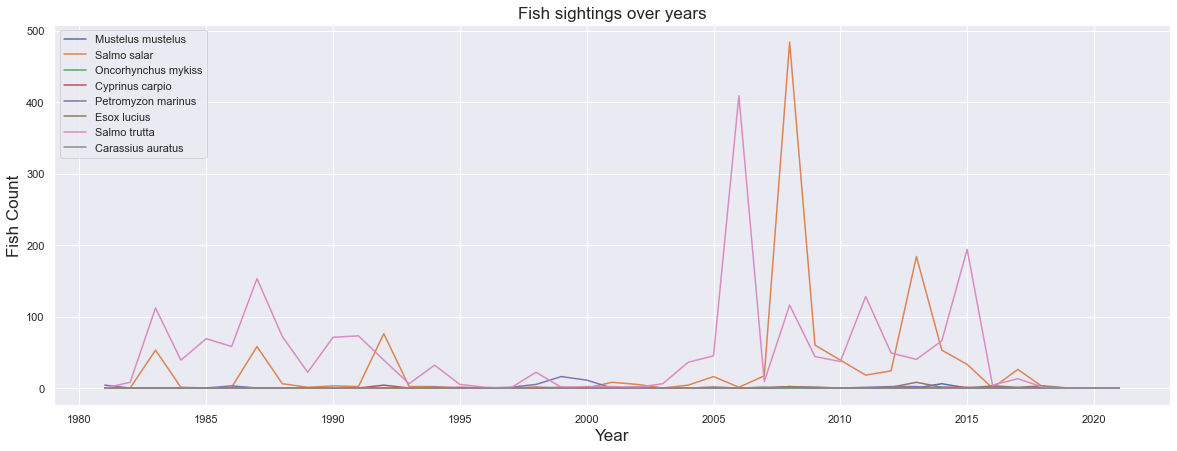

In [82]:
plt.figure(figsize=(20, 7))
plt.plot(mustelus.index, mustelus['FISH_COUNT'])
plt.plot(salmo_s.index, salmo_s['FISH_COUNT'])
plt.plot(oncorhynchus.index, oncorhynchus['FISH_COUNT'])
plt.plot(cyprinus.index, cyprinus['FISH_COUNT'])
plt.plot(petromyzon.index, petromyzon['FISH_COUNT'])
plt.plot(esox.index, esox['FISH_COUNT'])
plt.plot(salmo_t.index, salmo_t['FISH_COUNT'])
plt.plot(carassius.index, carassius['FISH_COUNT'])
plt.title("Fish sightings over years",fontsize=17)
plt.xlabel('Year', fontsize=17)
plt.ylabel('Fish Count', fontsize=17)
plt.legend(['Mustelus mustelus','Salmo salar','Oncorhynchus mykiss','Cyprinus carpio','Petromyzon marinus','Esox lucius','Salmo trutta','Carassius auratus'], loc='upper left')


It is visible, that over the years, the number of fishes from each species vary quite a lot. In order to visualize the trend for the species with a smaller fish count, we will plot the same data, but only for those species. This are all 6 species, but <i>Salmo salar</i> and <i>Salmo trutta</i>.

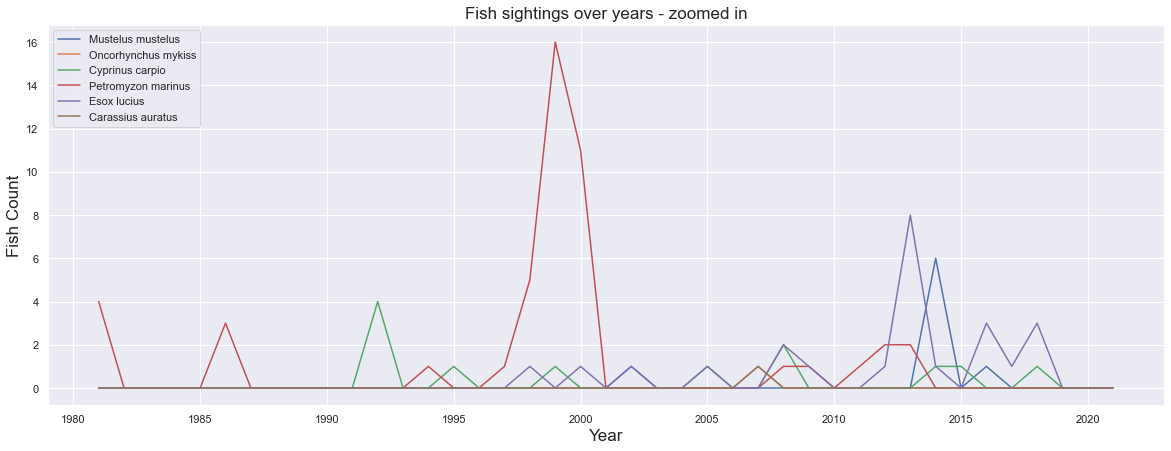

In [83]:
plt.figure(figsize=(20, 7))
plt.plot(mustelus.index, mustelus['FISH_COUNT'])
plt.plot(oncorhynchus.index, oncorhynchus['FISH_COUNT'])
plt.plot(cyprinus.index, cyprinus['FISH_COUNT'])
plt.plot(petromyzon.index, petromyzon['FISH_COUNT'])
plt.plot(esox.index, esox['FISH_COUNT'])
plt.plot(carassius.index, carassius['FISH_COUNT'])
plt.title("Fish sightings over years - zoomed in",fontsize=17)
plt.xlabel('Year', fontsize=17)
plt.ylabel('Fish Count', fontsize=17)
plt.legend(['Mustelus mustelus','Oncorhynchus mykiss','Cyprinus carpio','Petromyzon marinus','Esox lucius','Carassius auratus'], loc='upper left')

We can also notice now, that specimens of these species are less and less seen in the wild. Now we will visualise the factors that have been chosen as possible reasons for the species' decline. First, we plot the number of fish cought per year in the UK. We will focus however only on the interval 1981-2021, since these are also the years available in the fish count dataset.

Text(0, 0.5, 'Tonnes of Fish (t)')

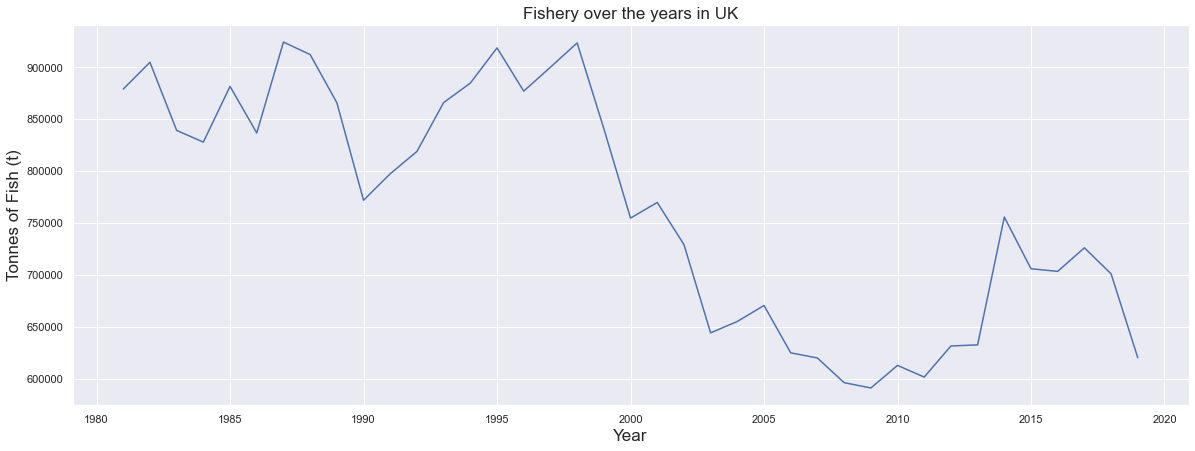

In [84]:
data_to_plot = df_uk_fishery.iloc[(1981-1950):(2019-1949)]

plt.figure(figsize=(20, 7))
plt.plot(data_to_plot.index, data_to_plot['VALUE'])
plt.title("Fishery over the years in UK",fontsize=17)
plt.xlabel('Year', fontsize=17)
plt.ylabel('Tonnes of Fish (t)', fontsize=17)

We can see that the fishing in UK has dropped between the years 1981 and 2019 to around 620,000 tonnes of fish per year. We can also see a discrepancy between the dataset regarding the fish counts and the fishery dataset, namely, that two years are missing from the second dataset, 2020 and 2021. This will be a think to look after when merging all the datasets.